In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
run_root_dir = '../results/dswe/pr_temp_tmin_tmax_dah_trasp_elev_slopeGTOPO_aspectGTOPO_pr_t7_temp_t7_tmin_t7_tmax_t7/'

In [3]:
save_dir = run_root_dir+'all_k/'

In [4]:
mode = 'val'   # 'train'

In [5]:
nfolds = 4

In [6]:
os.makedirs(save_dir+'train/daily_eval/', exist_ok=True)
os.makedirs(save_dir+'val/daily_eval/', exist_ok=True)
os.makedirs(save_dir+'train/cum_eval/', exist_ok=True)
os.makedirs(save_dir+'val/cum_eval/', exist_ok=True)
os.makedirs(save_dir+'train/swe_eval/', exist_ok=True)
os.makedirs(save_dir+'val/swe_eval/', exist_ok=True)

In [8]:
def calculate_r2_mae_mse(actual, predicted):
    mse = np.sum((actual - predicted)**2)/len(actual)
    mae = np.mean(abs(predicted - actual))
    r2 = 1 - (mse/np.var(actual))
    return r2, mae, mse

In [10]:
all_sites_df = pd.read_csv('../data/all_sites_df.csv', index_col=0)

In [11]:
features = ['pr', 'tmin', 'tmax', 'temp', 'sd', 'swe_t1', 'dah', 'trasp', 'elev', 'elevGTOPO', 'slopeGTOPO', 'aspectGTOPO', 
            'pr_t1', 'temp_t1', 'tmin_t1', 'tmax_t1', 'pr_t2', 'temp_t2', 'tmin_t2', 'tmax_t2', 'pr_t3', 'temp_t3', 'tmin_t3', 'tmax_t3', 
            'pr_t4', 'temp_t4', 'tmin_t4', 'tmax_t4', 'pr_t5', 'temp_t5', 'tmin_t5', 'tmax_t5', 'pr_t6', 'temp_t6', 'tmin_t6', 'tmax_t6', 'pr_t7', 'temp_t7', 'tmin_t7', 'tmax_t7']

In [12]:
nlags = 7

In [13]:
run_daily_dfs_lst = []

In [14]:
for k in range(nfolds):
    run_fold_daily_dir = f'{run_root_dir}k={k}/daily_eval/{mode}/{mode}_set.csv'
    run_fold_daily_df = pd.read_csv(run_fold_daily_dir, index_col=0)
    run_daily_dfs_lst.append(run_fold_daily_df)

FileNotFoundError: [Errno 2] No such file or directory: '/global/cfs/cdirs/dasrepo/yum/m1517/swe/UofA_improvements/regression/modeling_02202024/dswe/pr_temp_tmin_tmax_dah_trasp_elev_slopeGTOPO_aspectGTOPO_pr_t7_temp_t7_tmin_t7_tmax_t7/k=0/daily_eval/test/test_set.csv'

In [ ]:
run_daily_dfs = pd.concat(run_daily_dfs_lst)

In [ ]:
run_daily_dfs = run_daily_dfs[~pd.to_datetime(run_daily_dfs['datetime']).dt.month.isin([7, 8, 9])]

##### Begin: Outliers?

In [ ]:
# run_daily_dfs = run_daily_dfs[run_daily_dfs['pred_daily_abl_FIG2_match'] > -100]
run_daily_dfs[run_daily_dfs['pred_daily_abl_FIG2_match'] < -1000]

,datetime,sitecode,swe,swe_t1,pr,temp,tmin,tmax,sd,dah,...,rain,snow,pred_acc_abl_FIG2,pred_daily_abl_FIG2,pred_daily_abl_LM,pred_daily_abl_P2M,pred_daily_abl_P3M,pred_daily_abl_RF,pred_daily_abl_NN,pred_daily_abl_FIG2_match


In [ ]:
run_daily_dfs[run_daily_dfs['pred_daily_abl_P2M'] > 1000]#[['tmin_t1', 'tmin_t2', 'tmin_t3', 'tmin_t4', 'tmin_t5', 'tmin_t6', 'tmin_t7']]

,datetime,sitecode,swe,swe_t1,pr,temp,tmin,tmax,sd,dah,...,rain,snow,pred_acc_abl_FIG2,pred_daily_abl_FIG2,pred_daily_abl_LM,pred_daily_abl_P2M,pred_daily_abl_P3M,pred_daily_abl_RF,pred_daily_abl_NN,pred_daily_abl_FIG2_match


In [ ]:
run_daily_dfs[run_daily_dfs['pred_daily_abl_P3M'] > 1000]#[features[:20]]

,datetime,sitecode,swe,swe_t1,pr,temp,tmin,tmax,sd,dah,...,rain,snow,pred_acc_abl_FIG2,pred_daily_abl_FIG2,pred_daily_abl_LM,pred_daily_abl_P2M,pred_daily_abl_P3M,pred_daily_abl_RF,pred_daily_abl_NN,pred_daily_abl_FIG2_match


In [ ]:
run_daily_dfs[run_daily_dfs['pred_daily_abl_P3M'] < -1000]

,datetime,sitecode,swe,swe_t1,pr,temp,tmin,tmax,sd,dah,...,rain,snow,pred_acc_abl_FIG2,pred_daily_abl_FIG2,pred_daily_abl_LM,pred_daily_abl_P2M,pred_daily_abl_P3M,pred_daily_abl_RF,pred_daily_abl_NN,pred_daily_abl_FIG2_match


In [ ]:
run_daily_dfs[run_daily_dfs['pred_daily_abl_P2M'] < -1000]

,datetime,sitecode,swe,swe_t1,pr,temp,tmin,tmax,sd,dah,...,rain,snow,pred_acc_abl_FIG2,pred_daily_abl_FIG2,pred_daily_abl_LM,pred_daily_abl_P2M,pred_daily_abl_P3M,pred_daily_abl_RF,pred_daily_abl_NN,pred_daily_abl_FIG2_match


In [ ]:
run_daily_dfs.shape

(149423, 63)

In [ ]:
print(np.nanmin(run_daily_dfs['daily_abl']), np.nanmax(run_daily_dfs['daily_abl']))
print(np.nanmin(run_daily_dfs['pred_daily_abl_FIG2_match']), np.nanmax(run_daily_dfs['pred_daily_abl_FIG2_match']))
print(np.nanmin(run_daily_dfs['pred_daily_abl_LM']), np.nanmax(run_daily_dfs['pred_daily_abl_LM']))
print(np.nanmin(run_daily_dfs['pred_daily_abl_P2M']), np.nanmax(run_daily_dfs['pred_daily_abl_P2M']))
print(np.nanmin(run_daily_dfs['pred_daily_abl_P3M']), np.nanmax(run_daily_dfs['pred_daily_abl_P3M']))
print(np.nanmin(run_daily_dfs['pred_daily_abl_RF']), np.nanmax(run_daily_dfs['pred_daily_abl_RF']))
print(np.nanmin(run_daily_dfs['pred_daily_abl_NN']), np.nanmax(run_daily_dfs['pred_daily_abl_NN']))

-60.95999999999998 106.68
0.0 61.66447273130211
-11.497593073617006 26.963541538747798
-14.59068167496567 84.2261660010745
-25.6248145664116 142.21801245443424
-28.85439999999999 48.94579999999997
-5.368252 68.22678


In [ ]:
run_daily_dfs = run_daily_dfs[(run_daily_dfs['pred_daily_abl_P2M'] < 1000)]
run_daily_dfs = run_daily_dfs[(run_daily_dfs['pred_daily_abl_P3M'] < 1000)]
run_daily_dfs = run_daily_dfs[(run_daily_dfs['pred_daily_abl_P2M'] > -1000)]
run_daily_dfs = run_daily_dfs[(run_daily_dfs['pred_daily_abl_P3M'] > -1000)]

In [ ]:
len(run_daily_dfs)

##### End: Outliers?

### Aggregate

In [ ]:
# run_daily_dfs = run_daily_dfs[run_daily_dfs['pred_daily_abl_FIG2_match'] != -528.0009622082349]
# run_daily_dfs = run_daily_dfs[run_daily_dfs['pred_daily_abl_FIG2_match'] != -367.4994889711954]

In [ ]:
# run_daily_dfs = run_daily_dfs[run_daily_dfs['pred_daily_abl_FIG2_match'] > -1000]

In [ ]:
# np.min(run_daily_dfs['pred_daily_abl_LM'])

In [ ]:
# run_daily_dfs[run_daily_dfs['pred_daily_abl_FIG2_match'] == -528.0009622082349].index

In [ ]:
# run_daily_dfs[(run_daily_dfs['sitecode'] == '481_UT_SNTL') & (run_daily_dfs['water_year'] == 2002)]

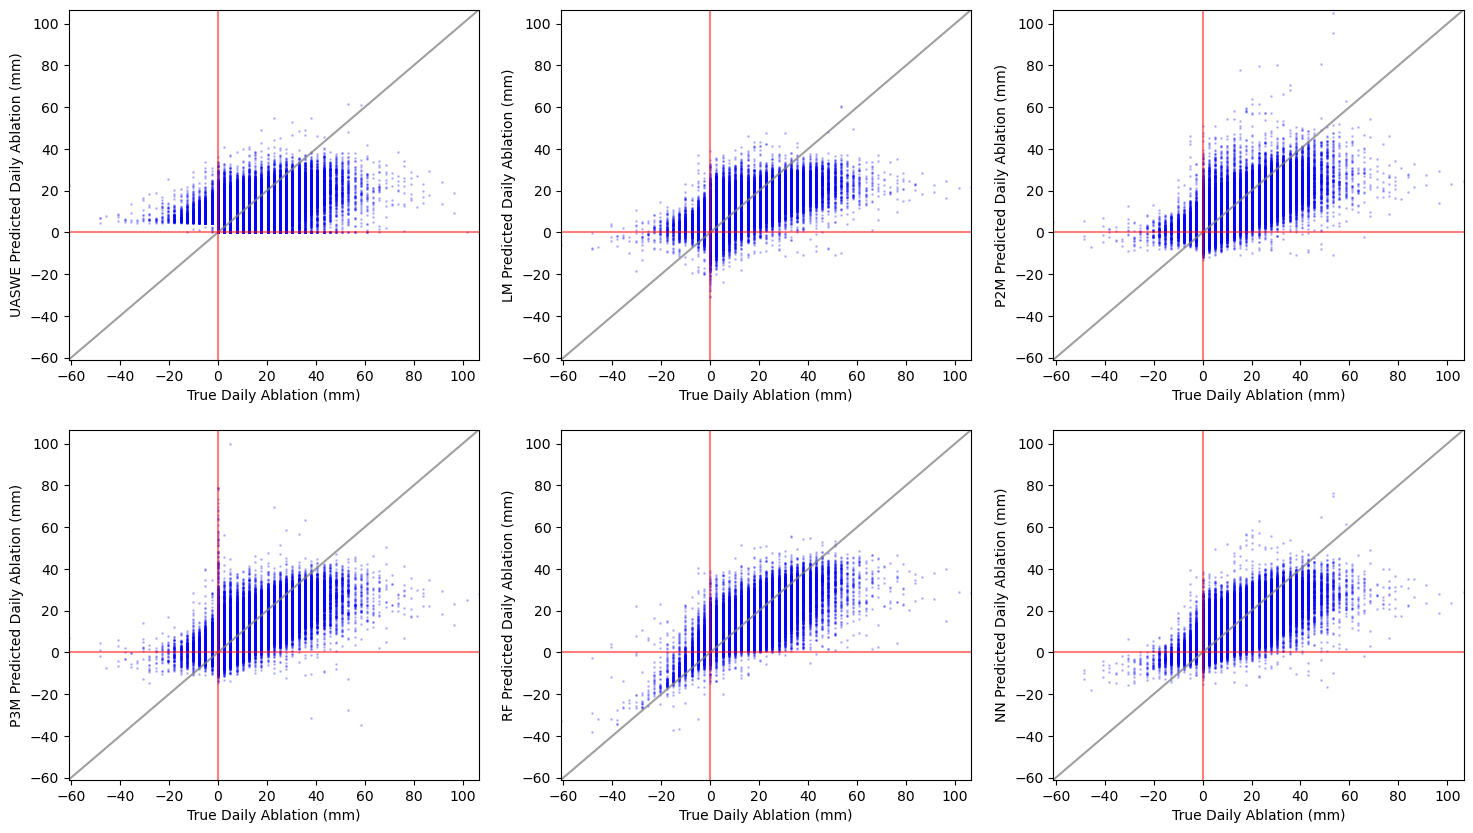

In [ ]:
xminimum, xmaximum = min(run_daily_dfs['daily_abl']), max(run_daily_dfs['daily_abl'])
yminimum = min(np.min(run_daily_dfs['pred_daily_abl_FIG2_match']), np.min(run_daily_dfs['pred_daily_abl_LM']), np.min(run_daily_dfs['pred_daily_abl_P2M']), np.min(run_daily_dfs['pred_daily_abl_P3M']), np.min(run_daily_dfs['pred_daily_abl_RF']), np.min(run_daily_dfs['pred_daily_abl_NN'])) 
ymaximum = max(np.max(run_daily_dfs['pred_daily_abl_FIG2_match']), np.max(run_daily_dfs['pred_daily_abl_LM']), np.max(run_daily_dfs['pred_daily_abl_P2M']), np.max(run_daily_dfs['pred_daily_abl_P3M']), np.max(run_daily_dfs['pred_daily_abl_RF']), np.max(run_daily_dfs['pred_daily_abl_NN'])) 
minimum, maximum = min(xminimum, yminimum), max(xmaximum, ymaximum)

fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes[0, 0].plot(run_daily_dfs['daily_abl'], run_daily_dfs['pred_daily_abl_FIG2_match'], 'bo', markersize=1, alpha=0.2) #row=0, col=0
axes[0, 1].plot(run_daily_dfs['daily_abl'], run_daily_dfs['pred_daily_abl_LM'], 'bo', markersize=1, alpha=0.2) #row=0, col=0
axes[0, 2].plot(run_daily_dfs['daily_abl'], run_daily_dfs['pred_daily_abl_P2M'], 'bo', markersize=1, alpha=0.2) #row=1, col=0
axes[1, 0].plot(run_daily_dfs['daily_abl'], run_daily_dfs['pred_daily_abl_P3M'], 'bo', markersize=1, alpha=0.2) #row=0, col=1
axes[1, 1].plot(run_daily_dfs['daily_abl'], run_daily_dfs['pred_daily_abl_RF'], 'bo', markersize=1, alpha=0.2) #row=1, col=1
axes[1, 2].plot(run_daily_dfs['daily_abl'], run_daily_dfs['pred_daily_abl_NN'], 'bo', markersize=1, alpha=0.2) #row=1, col=1
for i in range(2):
    for j in range(3):
        # if i != 1 or j != 2:
        axes[i,j].axline([0, 0], slope=1, color='grey', alpha=0.75)
        axes[i,j].axhline(0, xmin=minimum, xmax=maximum, color='red', alpha=0.5)
        axes[i,j].axvline(0, ymin=minimum, ymax=maximum, color='red', alpha=0.5)
        axes[i,j].set_xlim(minimum, maximum)
        axes[i,j].set_ylim(minimum, maximum)
        axes[i,j].set_xlabel('True Daily Ablation (mm)')
# axes[-1, -1].axis('off')
axes[0, 0].set_ylabel('UASWE Predicted Daily Ablation (mm)')
axes[0, 1].set_ylabel('LM Predicted Daily Ablation (mm)')
axes[0, 2].set_ylabel('P2M Predicted Daily Ablation (mm)')
axes[1, 0].set_ylabel('P3M Predicted Daily Ablation (mm)')
axes[1, 1].set_ylabel('RF Predicted Daily Ablation (mm)')
axes[1, 2].set_ylabel('NN Predicted Daily Ablation (mm)')
plt.savefig(f'{save_dir}{mode}/daily_eval/daily_abl_scatter.png', dpi=300)
# plt.savefig(f'{save_dir}{mode}/daily_eval/daily_abl_scatter_no_outlier.png', dpi=300)
# plt.show()

/tmp/ipykernel_536433/933198099.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i,j].set_xticklabels(labels=np.unique(run_daily_dfs['daily_abl'].round(2)), rotation=90)
/tmp/ipykernel_536433/933198099.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i,j].set_xticklabels(labels=np.unique(run_daily_dfs['daily_abl'].round(2)), rotation=90)
/tmp/ipykernel_536433/933198099.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i,j].set_xticklabels(labels=np.unique(run_daily_dfs['daily_abl'].round(2)), rotation=90)
/tmp/ipykernel_536433/933198099.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i,j].set_xticklabels(labels=np.unique

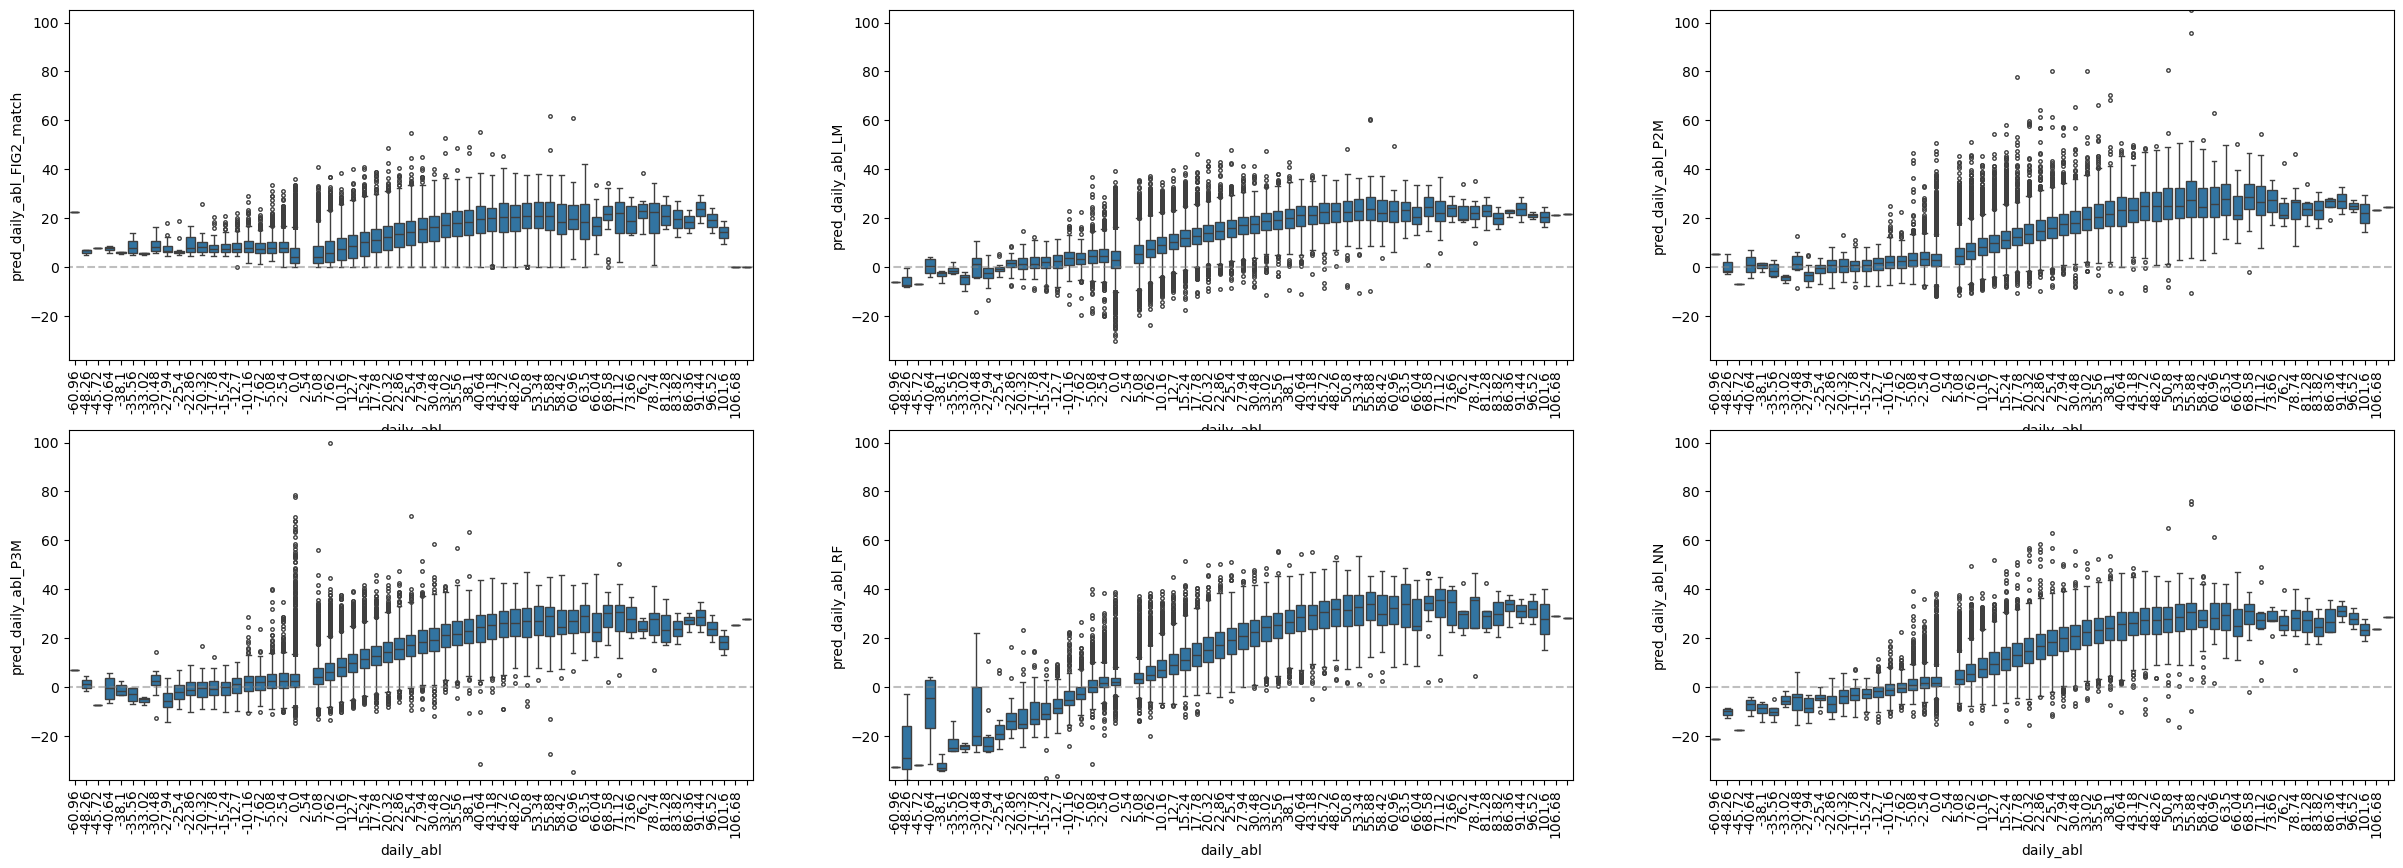

In [ ]:
# FIX THE y=x LINE AND x=0 LINE!!!
fig, axes = plt.subplots(2, 3, figsize=(30,10))
sns.boxplot(data=run_daily_dfs.round(2), x='daily_abl', y='pred_daily_abl_FIG2_match', ax=axes[0,0], flierprops={'marker': '.', 'markersize': 5})
sns.boxplot(data=run_daily_dfs.round(2), x='daily_abl', y='pred_daily_abl_LM', ax=axes[0,1], flierprops={'marker': '.', 'markersize': 5})
sns.boxplot(data=run_daily_dfs.round(2), x='daily_abl', y='pred_daily_abl_P2M', ax=axes[0,2], flierprops={'marker': '.', 'markersize': 5})
sns.boxplot(data=run_daily_dfs.round(2), x='daily_abl', y='pred_daily_abl_P3M', ax=axes[1,0], flierprops={'marker': '.', 'markersize': 5})
sns.boxplot(data=run_daily_dfs.round(2), x='daily_abl', y='pred_daily_abl_RF', ax=axes[1,1], flierprops={'marker': '.', 'markersize': 5})
sns.boxplot(data=run_daily_dfs.round(2), x='daily_abl', y='pred_daily_abl_NN', ax=axes[1,2], flierprops={'marker': '.', 'markersize': 5})
for i in range(2):
    for j in range(3):
        axes[i,j].set_xticklabels(labels=np.unique(run_daily_dfs['daily_abl'].round(2)), rotation=90)
        # axes[i,j].axline([0, 0], slope=1, color='grey', linestyle='--', alpha=0.5)
        axes[i,j].axhline(0, xmin=np.unique(run_daily_dfs['daily_abl'].round(2))[0], xmax=np.unique(run_daily_dfs['daily_abl'].round(2))[-1], color='grey', linestyle='--', alpha=0.5)
        # axes[i,j].axvline(0, ymin=minimum, ymax=maximum, color='grey', linestyle='--', alpha=0.5)
        axes[i,j].set_ylim(yminimum, ymaximum)
        # axes[i,j].set_ylim(-50, 80)
        # axes[i,j].set_xlabel('True Daily Ablation (mm)')
plt.savefig(f'{save_dir}{mode}/daily_eval/daily_abl_scatter_boxplot.png', dpi=300)
# plt.savefig(f'{save_dir}{mode}/daily_eval/daily_abl_scatter_boxplot_no_outlier.png', dpi=300)

In [ ]:
daily_UASWE_r2, daily_UASWE_mse = calculate_r2_mse(run_daily_dfs['daily_abl'], run_daily_dfs['pred_daily_abl_FIG2_match'])
daily_LM_r2, daily_LM_mse = calculate_r2_mse(run_daily_dfs['daily_abl'], run_daily_dfs['pred_daily_abl_LM'])
daily_P2M_r2, daily_P2M_mse = calculate_r2_mse(run_daily_dfs['daily_abl'], run_daily_dfs['pred_daily_abl_P2M'])
daily_P3M_r2, daily_P3M_mse = calculate_r2_mse(run_daily_dfs['daily_abl'], run_daily_dfs['pred_daily_abl_P3M'])
daily_RF_r2, daily_RF_mse = calculate_r2_mse(run_daily_dfs['daily_abl'], run_daily_dfs['pred_daily_abl_RF'])
daily_NN_r2, daily_NN_mse = calculate_r2_mse(run_daily_dfs['daily_abl'], run_daily_dfs['pred_daily_abl_NN'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print(daily_UASWE_r2, daily_LM_r2, daily_P2M_r2, daily_P3M_r2, daily_RF_r2, daily_NN_r2)
print(daily_UASWE_mse, daily_LM_mse, daily_P2M_mse, daily_P3M_mse, daily_RF_mse, daily_NN_mse)

In [ ]:
daily_UASWE_r2, daily_UASWE_mae, daily_UASWE_mse = calculate_r2_mse(run_daily_dfs[['daily_abl', 'pred_daily_abl_FIG2_match']].dropna()['daily_abl'], 
                                                                   run_daily_dfs[['daily_abl', 'pred_daily_abl_FIG2_match']].dropna()['pred_daily_abl_FIG2_match'])
daily_LM_r2, daily_LM_mae, daily_LM_mse = calculate_r2_mse(run_daily_dfs[['daily_abl', 'pred_daily_abl_LM']].dropna()['daily_abl'], 
                                             run_daily_dfs[['daily_abl', 'pred_daily_abl_LM']].dropna()['pred_daily_abl_LM'])
daily_P2M_r2, daily_P2M_mae, daily_P2M_mse = calculate_r2_mse(run_daily_dfs[['daily_abl', 'pred_daily_abl_P2M']].dropna()['daily_abl'], 
                                               run_daily_dfs[['daily_abl', 'pred_daily_abl_P2M']].dropna()['pred_daily_abl_P2M'])
daily_P3M_r2, daily_P3M_mae, daily_P3M_mse = calculate_r2_mse(run_daily_dfs[['daily_abl', 'pred_daily_abl_P3M']].dropna()['daily_abl'], 
                                               run_daily_dfs[['daily_abl', 'pred_daily_abl_P3M']].dropna()['pred_daily_abl_P3M'])
daily_RF_r2, daily_RF_mae, daily_RF_mse = calculate_r2_mse(run_daily_dfs[['daily_abl', 'pred_daily_abl_RF']].dropna()['daily_abl'], 
                                             run_daily_dfs[['daily_abl', 'pred_daily_abl_RF']].dropna()['pred_daily_abl_RF'])
daily_NN_r2, daily_NN_mae, daily_NN_mse = calculate_r2_mse(run_daily_dfs[['daily_abl', 'pred_daily_abl_NN']].dropna()['daily_abl'], 
                                             run_daily_dfs[['daily_abl', 'pred_daily_abl_NN']].dropna()['pred_daily_abl_NN'])

In [ ]:
calculate_r2_mse(run_daily_dfs[run_daily_dfs['pred_daily_abl_FIG2_match'] > -100][['daily_abl', 'pred_daily_abl_FIG2_match']].dropna()['daily_abl'], 
                 run_daily_dfs[run_daily_dfs['pred_daily_abl_FIG2_match'] > -100][['daily_abl', 'pred_daily_abl_FIG2_match']].dropna()['pred_daily_abl_FIG2_match'])


(0.35589233490461125, 2.8404776991185163, 33.16449135387438)

In [ ]:
print(daily_UASWE_r2, daily_LM_r2, daily_P2M_r2, daily_P3M_r2, daily_RF_r2, daily_NN_r2)
print(daily_UASWE_mse, daily_LM_mse, daily_P2M_mse, daily_P3M_mse, daily_RF_mse, daily_NN_mse)

0.35589233490461125 0.2814638609060075 0.4922586138909235 0.5400443684108265 0.6717398956456768 0.6191226645278662
33.16449135387438 36.996742724525596 26.14312128567031 23.682678213037434 16.9018007122592 19.611011921868094


In [ ]:
print(daily_UASWE_r2, daily_LM_r2, daily_P2M_r2, daily_P3M_r2, daily_RF_r2, daily_NN_r2)
print(daily_UASWE_mse, daily_LM_mse, daily_P2M_mse, daily_P3M_mse, daily_RF_mse, daily_NN_mse)

0.35589233490461125 0.2820717024215825 0.49926590777543134 0.5525600436347344 0.6865691572295882 0.6564968975155553
33.16449135387438 36.96544554273406 25.782322385051106 23.038257993803242 16.138256130762667 17.686648195200853


In [ ]:
print(daily_UASWE_r2, daily_LM_r2, daily_P2M_r2, daily_P3M_r2, daily_RF_r2, daily_NN_r2)
print(daily_UASWE_mse, daily_LM_mse, daily_P2M_mse, daily_P3M_mse, daily_RF_mse, daily_NN_mse)

0.35589233490461125 0.2820717024215825 0.49926590777543134 0.5525600436347344 0.6865691572295882 0.6572607418920466
33.16449135387438 36.96544554273406 25.782322385051106 23.038257993803242 16.138256130762667 17.64731857440508


In [ ]:
print(daily_UASWE_r2, daily_LM_r2, daily_P2M_r2, daily_P3M_r2, daily_RF_r2, daily_NN_r2)
print(daily_UASWE_mse, daily_LM_mse, daily_P2M_mse, daily_P3M_mse, daily_RF_mse, daily_NN_mse)

0.36988262850728115 0.28522384114945976 0.4814006157842593 0.5253274539778603 0.6036606361614444 0.5889475740071595
31.811406410717055 36.085396008080906 26.18143305040617 23.96379144055159 20.0091493268394 20.751936656487725


In [ ]:
print(daily_UASWE_r2, daily_LM_r2, daily_P2M_r2, daily_P3M_r2, daily_RF_r2, daily_NN_r2)
print(daily_UASWE_mse, daily_LM_mse, daily_P2M_mse, daily_P3M_mse, daily_RF_mse, daily_NN_mse)

0.36988262850728115 0.2871654575927819 0.4900254943670409 0.5383317728705905 0.6727583952953535 0.6512406415370877
31.811406410717055 35.98737371482793 25.74600700082752 23.30726982710804 16.520756533173945 17.607077972350197


In [ ]:
print(daily_UASWE_r2, daily_LM_r2, daily_P2M_r2, daily_P3M_r2, daily_RF_r2, daily_NN_r2)
print(daily_UASWE_mse, daily_LM_mse, daily_P2M_mse, daily_P3M_mse, daily_RF_mse, daily_NN_mse)

0.4140235197216078 0.37264082814305954 0.5591414501722696 0.5865803308286017 0.640167907384708 0.6351734890461385
44.93966193871664 48.11338005240372 33.81028907958652 31.705948611712234 27.5962144234008 27.979245960108898


In [ ]:
print(daily_UASWE_r2, daily_LM_r2, daily_P2M_r2, daily_P3M_r2, daily_RF_r2, daily_NN_r2)
print(daily_UASWE_mse, daily_LM_mse, daily_P2M_mse, daily_P3M_mse, daily_RF_mse, daily_NN_mse)

0.4140235197216078 0.3758243642885065 0.5708596742399465 0.6072068419088021 0.7082810918062892 0.6846717587640471
44.93966193871664 47.8692285498074 32.91159596502099 30.124061853255622 22.3724834640608 24.183128568814602


In [ ]:
print(daily_UASWE_r2, daily_LM_r2, daily_P2M_r2, daily_P3M_r2, daily_RF_r2, daily_NN_r2)
print(daily_UASWE_mse, daily_LM_mse, daily_P2M_mse, daily_P3M_mse, daily_RF_mse, daily_NN_mse)

0.29592887173811433 0.47143367917165835 0.5186806892082874 0.527071643286491 0.6508370970582873 0.5928261965844576
91.9054230181754 68.99602804167291 62.82867325398274 61.7333660426401 45.577730727762585 53.15014228350172


In [ ]:
# np.sum() and np.mean() replace NANs with 0.0

In [ ]:
daily_metrics = {'UA SWE Reg': [daily_UASWE_mse, daily_UASWE_mae, daily_UASWE_r2],
        'Lin Reg': [daily_LM_mse, daily_LM_mae, daily_LM_r2],
        'Quad Reg': [daily_P2M_mse, daily_P2M_mae, daily_P2M_r2],
        # # 'Quad Reg w/ Int': [p2im_mse, p2im_mae, p2im_rsq],
        'Cub Reg': [daily_P3M_mse, daily_P3M_mae, daily_P3M_r2],
        'RF': [daily_RF_mse, daily_RF_mae, daily_RF_r2],
        'NN': [daily_NN_mse, daily_NN_mae, daily_NN_r2]
        # # 'GLM': [glm_mse, glm_mae, glm_rsq]
       }

In [ ]:
# Creates pandas DataFrame.
daily_metrics_df = pd.DataFrame(daily_metrics, index=['MSE', 'MAE', 'R2'])

In [ ]:
daily_metrics_df

,UA SWE Reg,Lin Reg,Quad Reg,Cub Reg,RF,NN
MSE,91.905423,68.996028,62.828673,61.733366,45.577731,53.195572
MAE,6.927989,6.110902,5.647066,5.566633,4.583219,5.010968
R2,0.295929,0.471434,0.518681,0.527072,0.650837,0.592478


In [ ]:
daily_metrics_df.to_csv(f'{save_dir}{mode}/daily_eval/daily_abl_metrics.csv')
# daily_metrics_df.to_csv(f'{save_dir}{mode}/daily_eval/daily_abl_metrics_no_outlier.csv')

### Climatological

In [ ]:
freqs = run_daily_dfs.groupby([(pd.to_datetime(run_daily_dfs['datetime']).dt.month),(pd.to_datetime(run_daily_dfs['datetime']).dt.day)])['pred_daily_abl_LM'].size()
freqs.index.names=['Month', 'Day']
freqs = freqs.to_frame()

In [ ]:
# create datetime column in freqs df

In [ ]:
freqs['date'] = freqs.index.get_level_values('Month').astype(str) + '-' + freqs.index.get_level_values('Day').astype(str)

In [ ]:
freqs['month'] = [str(i).zfill(2) for i in freqs.index.get_level_values('Month')]

In [ ]:
freqs['day'] = [str(i).zfill(2) for i in freqs.index.get_level_values('Day')]

In [ ]:
freqs['datetime'] = [datetime.datetime(2001, int(row['month']), int(row['day'])) for idx, row in freqs.iterrows()]

In [ ]:
# separate df of all dates in a year

In [ ]:
yr_dates = pd.date_range(start="2001-01-01",end="2001-12-31").to_frame(name='datetime')

In [ ]:
yr_dates['month'] = [str(i).zfill(2) for i in pd.to_datetime(yr_dates['datetime']).dt.month]

In [ ]:
yr_dates['day'] = [str(i).zfill(2) for i in pd.to_datetime(yr_dates['datetime']).dt.day]

In [ ]:
yr_dates['date'] = pd.to_datetime(yr_dates['datetime']).dt.month.astype(str) + '-' + pd.to_datetime(yr_dates['datetime']).dt.day.astype(str)

In [ ]:
# merge dfs

In [ ]:
full_yr = freqs.merge(yr_dates, how='outer', on=['datetime', 'month', 'day', 'date']).fillna(0, inplace = False).sort_values(by='datetime', ascending=True)

In [ ]:
full_yr = full_yr.reset_index(drop=True)

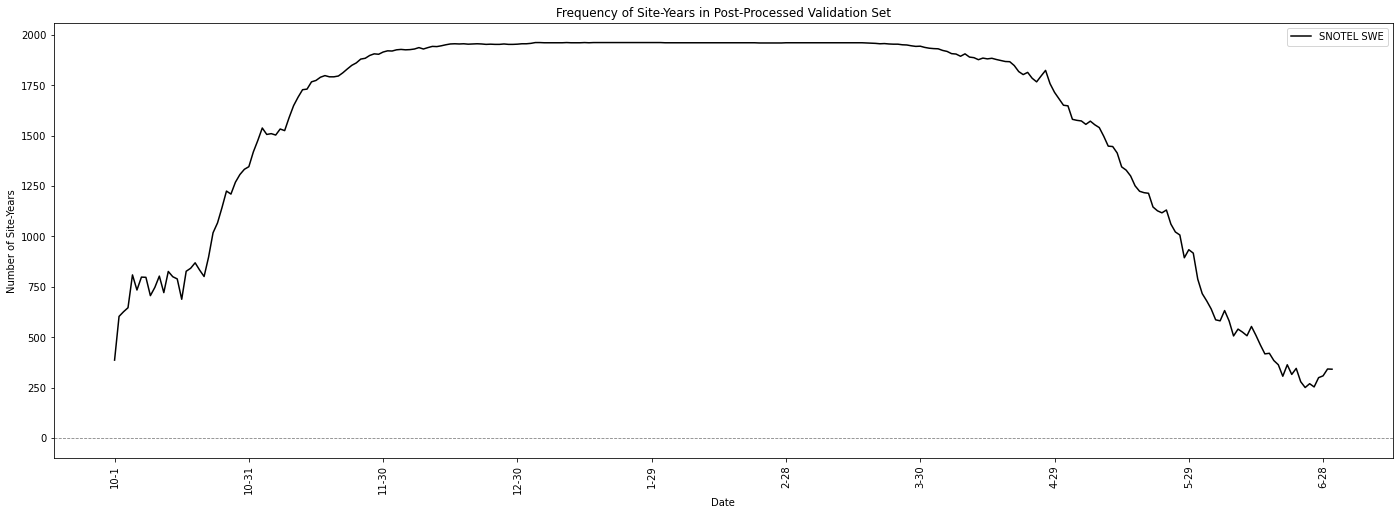

In [ ]:
# 10042023
fig, ax = plt.subplots(figsize=(24, 8))
ax.plot(pd.concat([full_yr[273:]['date'], full_yr[:181]['date']]).values, pd.concat([full_yr[273:]['pred_daily_abl_LM'], full_yr[:181]['pred_daily_abl_LM']]).values, label='SNOTEL SWE', color='black')
ax.set_xticks(ax.get_xticks()[::30])   # tick at every 30th entry
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list(pd.concat([full_yr[273:]['date'], full_yr[:181]['date']]).values)[::30])    # tick labels at every 30th entry
ax.set_title('Frequency of Site-Years in Post-Processed Validation Set')
ax.set_ylabel('Number of Site-Years')
ax.set_xlabel('Date')
# ax.axhline(5, color='grey', linestyle='--', linewidth=0.8)
# ax.axhline(2, color='grey', linestyle='--', linewidth=0.8)
# ax.axhline(1, color='grey', linestyle='--', linewidth=0.8)
ax.axhline(0, color='grey', linestyle='--', linewidth=0.8)
ax.legend()
# ax.axhline(200, linestyle='--', color='lightgrey')
plt.savefig(f'{save_dir}{mode}/daily_eval/freq_by_date.png', dpi=300)

##### Maybe Use: Begin

In [ ]:
UASWE_metrics = run_daily_dfs[['datetime', 'daily_abl', 'pred_daily_abl_FIG2_match']].rename(columns={'daily_abl':'Actual', 'pred_daily_abl_FIG2_match':'Predicted'}).groupby([pd.to_datetime(run_daily_dfs['datetime']).dt.month, pd.to_datetime(run_daily_dfs['datetime']).dt.day]).apply(metrics)
UASWE_metrics.index.names=['Month','Day']
# UASWE_metrics.index.get_level_values('Month')
# UASWE_metrics = UASWE_metrics.drop([7,8,9], level='Month')

LM_metrics = run_daily_dfs[['datetime', 'daily_abl', 'pred_daily_abl_LM']].rename(columns={'daily_abl':'Actual', 'pred_daily_abl_LM':'Predicted'}).groupby([pd.to_datetime(run_daily_dfs['datetime']).dt.month, pd.to_datetime(run_daily_dfs['datetime']).dt.day]).apply(metrics)
LM_metrics.index.names=['Month','Day']
# LM_metrics.index.get_level_values('Month')
# LM_metrics = LM_metrics.drop([7,8,9], level='Month')

P2M_metrics = run_daily_dfs[['datetime', 'daily_abl', 'pred_daily_abl_P2M']].rename(columns={'daily_abl':'Actual', 'pred_daily_abl_P2M':'Predicted'}).groupby([pd.to_datetime(run_daily_dfs['datetime']).dt.month, pd.to_datetime(run_daily_dfs['datetime']).dt.day]).apply(metrics)
P2M_metrics.index.names=['Month','Day']
# P2M_metrics.index.get_level_values('Month')
# P2M_metrics = P2M_metrics.drop([7,8,9], level='Month')

P3M_metrics = run_daily_dfs[['datetime', 'daily_abl', 'pred_daily_abl_P3M']].rename(columns={'daily_abl':'Actual', 'pred_daily_abl_P3M':'Predicted'}).groupby([pd.to_datetime(run_daily_dfs['datetime']).dt.month, pd.to_datetime(run_daily_dfs['datetime']).dt.day]).apply(metrics)
P3M_metrics.index.names=['Month','Day']
# P3M_metrics.index.get_level_values('Month')
# P3M_metrics = P3M_metrics.drop([7,8,9], level='Month')

RF_metrics = run_daily_dfs[['datetime', 'daily_abl', 'pred_daily_abl_RF']].rename(columns={'daily_abl':'Actual', 'pred_daily_abl_RF':'Predicted'}).groupby([pd.to_datetime(run_daily_dfs['datetime']).dt.month, pd.to_datetime(run_daily_dfs['datetime']).dt.day]).apply(metrics)
RF_metrics.index.names=['Month','Day']
# RF_metrics.index.get_level_values('Month')
# RF_metrics = RF_metrics.drop([7,8,9], level='Month')

NN_metrics = run_daily_dfs[['datetime', 'daily_abl', 'pred_daily_abl_NN']].rename(columns={'daily_abl':'Actual', 'pred_daily_abl_NN':'Predicted'}).groupby([pd.to_datetime(run_daily_dfs['datetime']).dt.month, pd.to_datetime(run_daily_dfs['datetime']).dt.day]).apply(metrics)
NN_metrics.index.names=['Month','Day']
# NN_metrics.index.get_level_values('Month')
# NN_metrics = NN_metrics.drop([7,8,9], level='Month')

In [ ]:
UASWE_metrics['date'] = UASWE_metrics.index.get_level_values('Month').astype(str) + '-' + UASWE_metrics.index.get_level_values('Day').astype(str)
LM_metrics['date'] = LM_metrics.index.get_level_values('Month').astype(str) + '-' + LM_metrics.index.get_level_values('Day').astype(str)
P2M_metrics['date'] = P2M_metrics.index.get_level_values('Month').astype(str) + '-' + P2M_metrics.index.get_level_values('Day').astype(str)
P3M_metrics['date'] = P3M_metrics.index.get_level_values('Month').astype(str) + '-' + P3M_metrics.index.get_level_values('Day').astype(str)
RF_metrics['date'] = RF_metrics.index.get_level_values('Month').astype(str) + '-' + RF_metrics.index.get_level_values('Day').astype(str)
NN_metrics['date'] = NN_metrics.index.get_level_values('Month').astype(str) + '-' + NN_metrics.index.get_level_values('Day').astype(str)

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values, pd.concat([UASWE_metrics[181:]['mse'], UASWE_metrics[:181]['mse']]).values, label='UA', color='black')
ax.plot(pd.concat([LM_metrics[181:]['date'], LM_metrics[:181]['date']]).values, pd.concat([LM_metrics[181:]['mse'], LM_metrics[:181]['mse']]).values, label='LM')
ax.plot(pd.concat([P2M_metrics[181:]['date'], P2M_metrics[:181]['date']]).values, pd.concat([P2M_metrics[181:]['mse'], P2M_metrics[:181]['mse']]).values, label='P2M')
ax.plot(pd.concat([P3M_metrics[181:]['date'], P3M_metrics[:181]['date']]).values, pd.concat([P3M_metrics[181:]['mse'], P3M_metrics[:181]['mse']]).values, label='P3M')
ax.plot(pd.concat([RF_metrics[181:]['date'], RF_metrics[:181]['date']]).values, pd.concat([RF_metrics[181:]['mse'], RF_metrics[:181]['mse']]).values, label='RF')
ax.plot(pd.concat([NN_metrics[181:]['date'], NN_metrics[:181]['date']]).values, pd.concat([NN_metrics[181:]['mse'], NN_metrics[:181]['mse']]).values, label='NN')
ax.set_xticks(ax.get_xticks()[::30])   # tick at every 30th entry
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values)[::30])    # tick labels at every 30th entry
ax.set_title('Cumulative Ablation: MSE')
ax.legend()
# ax.axhline(200, linestyle='--', color='lightgrey')
# plt.savefig(f'{save_pth}cum_eval/climatological_scheme/{mode}/cum_abl_mse_plot.png', dpi=300)
plt.show()

plt.clf()
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values, pd.concat([UASWE_metrics[181:]['rmse'], UASWE_metrics[:181]['rmse']]).values, label='UA', color='black')
ax.plot(pd.concat([LM_metrics[181:]['date'], LM_metrics[:181]['date']]).values, pd.concat([LM_metrics[181:]['rmse'], LM_metrics[:181]['rmse']]).values, label='LM')
ax.plot(pd.concat([P2M_metrics[181:]['date'], P2M_metrics[:181]['date']]).values, pd.concat([P2M_metrics[181:]['rmse'], P2M_metrics[:181]['rmse']]).values, label='P2M')
ax.plot(pd.concat([P3M_metrics[181:]['date'], P3M_metrics[:181]['date']]).values, pd.concat([P3M_metrics[181:]['rmse'], P3M_metrics[:181]['rmse']]).values, label='P3M')
ax.plot(pd.concat([RF_metrics[181:]['date'], RF_metrics[:181]['date']]).values, pd.concat([RF_metrics[181:]['rmse'], RF_metrics[:181]['rmse']]).values, label='RF')
ax.plot(pd.concat([NN_metrics[181:]['date'], NN_metrics[:181]['date']]).values, pd.concat([NN_metrics[181:]['rmse'], NN_metrics[:181]['rmse']]).values, label='NN')
ax.set_xticks(ax.get_xticks()[::30])   # tick at every 30th entry
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values)[::30])    # tick labels at every 30th entry
ax.set_title('Cumulative Ablation: RMSE')
ax.legend()
# ax.axhline(200, linestyle='--', color='lightgrey')
# plt.savefig(f'{save_pth}cum_eval/climatological_scheme/{mode}/cum_abl_mse_plot.png', dpi=300)
plt.show()

plt.clf()
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values, pd.concat([UASWE_metrics[181:]['mae'], UASWE_metrics[:181]['mae']]).values, label='UA', color='black')
ax.plot(pd.concat([LM_metrics[181:]['date'], LM_metrics[:181]['date']]).values, pd.concat([LM_metrics[181:]['mae'], LM_metrics[:181]['mae']]).values, label='LM')
ax.plot(pd.concat([P2M_metrics[181:]['date'], P2M_metrics[:181]['date']]).values, pd.concat([P2M_metrics[181:]['mae'], P2M_metrics[:181]['mae']]).values, label='P2M')
ax.plot(pd.concat([P3M_metrics[181:]['date'], P3M_metrics[:181]['date']]).values, pd.concat([P3M_metrics[181:]['mae'], P3M_metrics[:181]['mae']]).values, label='P3M')
ax.plot(pd.concat([RF_metrics[181:]['date'], RF_metrics[:181]['date']]).values, pd.concat([RF_metrics[181:]['mae'], RF_metrics[:181]['mae']]).values, label='RF')
ax.plot(pd.concat([NN_metrics[181:]['date'], NN_metrics[:181]['date']]).values, pd.concat([NN_metrics[181:]['mae'], NN_metrics[:181]['mae']]).values, label='NN')
ax.set_xticks(ax.get_xticks()[::30])   # tick at every 30th entry
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values)[::30])    # tick labels at every 30th entry
ax.set_title('Cumulative Ablation: MAE')
ax.legend()
# ax.axhline(200, linestyle='--', color='lightgrey')
# plt.savefig(f'{save_pth}cum_eval/climatological_scheme/{mode}/cum_abl_mae_plot.png', dpi=300)
plt.show()

plt.clf()
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values, pd.concat([UASWE_metrics[181:]['r2'], UASWE_metrics[:181]['r2']]).values, label='UA', color='black')
ax.plot(pd.concat([LM_metrics[181:]['date'], LM_metrics[:181]['date']]).values, pd.concat([LM_metrics[181:]['r2'], LM_metrics[:181]['r2']]).values, label='LM')
ax.plot(pd.concat([P2M_metrics[181:]['date'], P2M_metrics[:181]['date']]).values, pd.concat([P2M_metrics[181:]['r2'], P2M_metrics[:181]['r2']]).values, label='P2M')
ax.plot(pd.concat([P3M_metrics[181:]['date'], P3M_metrics[:181]['date']]).values, pd.concat([P3M_metrics[181:]['r2'], P3M_metrics[:181]['r2']]).values, label='P3M')
ax.plot(pd.concat([RF_metrics[181:]['date'], RF_metrics[:181]['date']]).values, pd.concat([RF_metrics[181:]['r2'], RF_metrics[:181]['r2']]).values, label='RF')
ax.plot(pd.concat([NN_metrics[181:]['date'], NN_metrics[:181]['date']]).values, pd.concat([NN_metrics[181:]['r2'], NN_metrics[:181]['r2']]).values, label='NN')
ax.set_xticks(ax.get_xticks()[::30])   # tick at every 30th entry
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values)[::30])    # tick labels at every 30th entry
ax.set_title('Cumulative Ablation: R2')
ax.legend()
# ax.set_ylim(-1, 1)
ax.axhline(0, linestyle='--', color='lightgrey')
# plt.savefig(f'{save_pth}cum_eval/climatological_scheme/{mode}/cum_abl_r2_plot.png', dpi=300)
plt.show()

##### Maybe Use: End

In [28]:
run_cum_dfs_lst = []

In [29]:
for k in range(nfolds):
    exclude_lst = []
    with open(f"/global/cfs/cdirs/m1517/yum/swe/UofA_improvements/regression/modeling_12122023/k{k}_site_years_exclude.txt", "r") as f:
    # with open(f"/global/cfs/cdirs/m1517/yum/swe/UofA_improvements/regression/modeling_12122023/k{k}_site_years_exclude_SDSUB.txt", "r") as f:
        for line in f:
            exclude_lst.append(line.strip())
            
    k_run_cum_dfs_lst = []
    # print(k)
            
    run_fold_cum_dir = f'{run_root_dir}k={k}/cum_swe_ts/{mode}'
    for file in os.listdir(run_fold_cum_dir):
        filename = os.fsdecode(file)
        if filename.endswith("_df.csv") and filename not in exclude_lst: 
            # print(os.path.join(directory, filename))
            # print(filename)
            df = pd.read_csv(os.path.join(run_fold_cum_dir, filename), index_col=0)
            k_run_cum_dfs_lst.append(df)
        # else:
        #     print(filename)
    run_fold_cum_df = pd.concat(k_run_cum_dfs_lst)
    
    run_cum_dfs_lst.append(run_fold_cum_df)

FileNotFoundError: [Errno 2] No such file or directory: '/global/cfs/cdirs/m1517/yum/swe/UofA_improvements/regression/modeling_02202024/k0_site_years_exclude.txt'

In [ ]:
run_cum_dfs = pd.concat(run_cum_dfs_lst)

In [ ]:
run_cum_dfs = run_cum_dfs[~pd.to_datetime(run_cum_dfs['datetime']).dt.month.isin([7, 8, 9])]

#### Begin: Full, no exclude

In [21]:
run_cum_dfs_lst = []

In [22]:
for k in range(nfolds):
    run_fold_cum_dir = f'{run_root_dir}k={k}/cum_swe_ts/{mode}/ALL_SITES_WY_DF.csv'
    run_fold_cum_df = pd.read_csv(run_fold_cum_dir, index_col=0)
    run_cum_dfs_lst.append(run_fold_cum_df)

In [23]:
run_cum_dfs = pd.concat(run_cum_dfs_lst)

In [27]:
run_cum_dfs.keys()

Index(['datetime', 'sitecode', 'swe', 'swe_t1', 'pr', 'temp', 'tmin', 'tmax',
       'sd', 'sd_t1', 'dah', 'trasp', 'elev', 'elevGTOPO', 'slopeGTOPO',
       'aspectGTOPO', 'dd', 'acc_snw', 'acc_dd', 'abl_snw', 'acc_snw_FIG2',
       'acc_dd_FIG2', 'pr_t1', 'temp_t1', 'tmax_t1', 'tmin_t1', 'pr_t2',
       'temp_t2', 'tmax_t2', 'tmin_t2', 'pr_t3', 'temp_t3', 'tmax_t3',
       'tmin_t3', 'pr_t4', 'temp_t4', 'tmax_t4', 'tmin_t4', 'pr_t5', 'temp_t5',
       'tmax_t5', 'tmin_t5', 'pr_t6', 'temp_t6', 'tmax_t6', 'tmin_t6', 'pr_t7',
       'temp_t7', 'tmax_t7', 'tmin_t7', 'daily_abl', 'daily_acc', 'water_year',
       'temp_partition', 'rain', 'snow', 'pred_acc_abl_FIG2',
       'pred_daily_abl_FIG2', 'pred_daily_abl_LM', 'pred_daily_abl_P2M',
       'pred_daily_abl_P3M', 'pred_daily_abl_RF', 'pred_daily_abl_NN',
       'pred_daily_acc_abl_UASWE', 'pred_daily_acc_abl_LM',
       'pred_daily_acc_abl_P2M', 'pred_daily_acc_abl_P3M',
       'pred_daily_acc_abl_RF', 'pred_daily_acc_abl_NN', 'pred_a

In [30]:
run_cum_dfs[(run_cum_dfs['temp_t7'].isna())][features][:60]

,pr,tmin,tmax,temp,sd,swe,dah,trasp,elev,elevGTOPO,...,tmin_t5,tmax_t5,pr_t6,temp_t6,tmin_t6,tmax_t6,pr_t7,temp_t7,tmin_t7,tmax_t7
345165,0.00,2.000,16.100,8.7000,0.0,0.00,1.216332,0.058240,2895.600098,2913.287167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345166,0.00,1.600,14.300,7.2000,0.0,0.00,1.216332,0.058240,2895.600098,2913.287167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345167,5.08,-0.300,12.700,5.6000,0.0,0.00,1.216332,0.058240,2895.600098,2913.287167,...,-1.500,16.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345168,0.00,1.500,12.900,6.9000,0.0,0.00,1.216332,0.058240,2895.600098,2913.287167,...,-2.089,16.300,0.0,6.9000,-1.500,16.000,NaN,NaN,NaN,NaN
758774,0.00,3.800,14.600,7.8000,0.0,0.00,-1.059379,0.003989,3096.158447,3144.700603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758775,2.54,0.900,12.500,5.5000,0.0,0.00,-1.059379,0.003989,3096.158447,3144.700603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758776,2.54,0.200,9.600,4.0000,0.0,0.00,-1.059379,0.003989,3096.158447,3144.700603,...,0.200,13.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758777,0.00,2.400,11.000,5.4000,0.0,0.00,-1.059379,0.003989,3096.158447,3144.700603,...,1.900,13.800,0.0,5.7000,0.200,13.100,NaN,NaN,NaN,NaN
5474,NaN,-1.400,10.100,2.8000,NaN,0.00,-1.101812,0.155004,3340.607910,3301.003351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5475,7.62,-2.500,7.700,1.6000,NaN,5.08,-1.101812,0.155004,3340.607910,3301.003351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
run_cum_dfs[['temp_t1', 'temp_t2', 'temp_t3', 'temp_t4', 'temp_t5', 'temp_t6', 'temp_t7']].loc[345165:345170]

,temp_t1,temp_t2,temp_t3,temp_t4,temp_t5,temp_t6,temp_t7
345165,7.2,7.0,6.9,NaN,NaN,NaN,NaN
345166,8.7,7.2,7.0,6.9,NaN,NaN,NaN
345167,7.2,8.7,7.2,7.0,6.9,NaN,NaN
345168,5.6,7.2,8.7,7.2,7.0,6.9,NaN
345169,6.9,5.6,7.2,8.7,7.2,7.0,6.9
345170,7.9,6.9,5.6,7.2,8.7,7.2,7.0


In [13]:
run_cum_dfs[run_cum_dfs['temp_t7'].isna()][['datetime','sitecode','pred_daily_acc_abl_P3M', 'pred_acc_abl_P3M', 'pred_acc_abl_RF', 'pred_daily_acc_abl_RF', 'pred_swe_P3M','pred_swe_RF']][:60]

,datetime,sitecode,pred_daily_acc_abl_P3M,pred_acc_abl_P3M,pred_acc_abl_RF,pred_daily_acc_abl_RF,pred_swe_P3M,pred_swe_RF
345165,2006-10-01 00:00:00+00:00,521_UT_SNTL,0.0,0.0,0.0,0.0,0.0,0.0
345166,2006-10-02 00:00:00+00:00,521_UT_SNTL,NaN,NaN,NaN,NaN,NaN,NaN
345167,2006-10-03 00:00:00+00:00,521_UT_SNTL,NaN,NaN,NaN,NaN,NaN,NaN
345168,2006-10-04 00:00:00+00:00,521_UT_SNTL,NaN,NaN,NaN,NaN,NaN,NaN
758774,2006-10-01 00:00:00+00:00,790_UT_SNTL,0.0,0.0,0.0,0.0,0.0,0.0
758775,2006-10-02 00:00:00+00:00,790_UT_SNTL,NaN,NaN,NaN,NaN,NaN,NaN
758776,2006-10-03 00:00:00+00:00,790_UT_SNTL,NaN,NaN,NaN,NaN,NaN,NaN
758777,2006-10-04 00:00:00+00:00,790_UT_SNTL,NaN,NaN,NaN,NaN,NaN,NaN
5474,2002-10-01 00:00:00+00:00,1030_CO_SNTL,0.0,0.0,0.0,0.0,0.0,0.0
5475,2002-10-02 00:00:00+00:00,1030_CO_SNTL,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
run_cum_dfs.dropna(subset=features, how='any')

,datetime,sitecode,swe,swe_t1,pr,temp,tmin,tmax,sd,dah,...,pred_acc_abl_P3M,pred_acc_abl_RF,pred_acc_abl_NN,UASWE,pred_swe_UASWE,pred_swe_LM,pred_swe_P2M,pred_swe_P3M,pred_swe_RF,pred_swe_NN
1825,2006-10-01 00:00:00+00:00,1014_CO_SNTL,0.0,0.0,2.54,7.200,-1.600,18.000000,1.0,-1.062399,...,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000
1826,2006-10-02 00:00:00+00:00,1014_CO_SNTL,0.0,0.0,0.00,7.700,-0.800,18.400000,0.0,-1.062399,...,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000
1827,2006-10-03 00:00:00+00:00,1014_CO_SNTL,0.0,0.0,0.00,5.300,-1.100,11.900000,0.0,-1.062399,...,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000
1828,2006-10-04 00:00:00+00:00,1014_CO_SNTL,0.0,0.0,2.54,7.200,-3.000,18.700000,1.0,-1.062399,...,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000
1829,2006-10-05 00:00:00+00:00,1014_CO_SNTL,0.0,0.0,0.00,7.600,3.300,12.900000,0.0,-1.062399,...,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920693,2002-09-13 00:00:00+00:00,970_CO_SNTL,0.0,0.0,7.62,3.600,0.600,6.800000,0.0,-0.713884,...,411.479997,411.48,-21.212706,0.0,0.0,0.000004,10000.0,0.000003,3.410605e-13,432.692706
920694,2002-09-14 00:00:00+00:00,970_CO_SNTL,0.0,0.0,2.54,5.100,-0.100,14.100000,0.0,-0.713884,...,411.479997,411.48,-21.106951,0.0,0.0,0.000004,10000.0,0.000003,3.410605e-13,432.586951
920695,2002-09-15 00:00:00+00:00,970_CO_SNTL,0.0,0.0,0.00,7.500,0.600,17.400000,0.0,-0.713884,...,411.479997,411.48,-20.904206,0.0,0.0,0.000004,10000.0,0.000003,3.410605e-13,432.384206
920696,2002-09-16 00:00:00+00:00,970_CO_SNTL,0.0,0.0,0.00,8.200,1.700,17.600000,0.0,-0.713884,...,411.479997,411.48,-20.804168,0.0,0.0,0.000004,10000.0,0.000003,3.410605e-13,432.284168


In [51]:
run_cum_dfs[features]

,pr,tmin,tmax,temp,sd,swe,dah,trasp,elev,elevGTOPO,...,tmin_t5,tmax_t5,pr_t6,temp_t6,tmin_t6,tmax_t6,pr_t7,temp_t7,tmin_t7,tmax_t7
1825,2.54,-1.600,18.000,7.2000,1.0,0.0,-1.062399,0.080256,2724.912109,2757.466603,...,-3.800,15.300,0.0,3.1000,-4.000,13.100,0.0,2.8000,-2.700,9.900
1826,0.00,-0.800,18.400,7.7000,0.0,0.0,-1.062399,0.080256,2724.912109,2757.466603,...,-3.600,15.200,0.0,4.4000,-3.800,15.300,0.0,3.1000,-4.000,13.100
1827,0.00,-1.100,11.900,5.3000,0.0,0.0,-1.062399,0.080256,2724.912109,2757.466603,...,-2.900,17.500,0.0,4.9000,-3.600,15.200,0.0,4.4000,-3.800,15.300
1828,2.54,-3.000,18.700,7.2000,1.0,0.0,-1.062399,0.080256,2724.912109,2757.466603,...,-1.022,18.600,0.0,6.0000,-2.900,17.500,0.0,4.9000,-3.600,15.200
1829,0.00,3.300,12.900,7.6000,0.0,0.0,-1.062399,0.080256,2724.912109,2757.466603,...,-2.000,18.900,0.0,6.7000,-1.022,18.600,0.0,6.0000,-2.900,17.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920706,5.08,-0.696,13.181,6.2425,NaN,0.0,-0.713884,0.769067,3169.919922,3242.580262,...,-1.978,11.690,0.0,-0.2650,-4.575,4.045,0.0,0.7850,-3.097,4.667
920707,12.70,-2.973,6.260,1.6435,NaN,0.0,-0.713884,0.769067,3169.919922,3242.580262,...,-1.705,12.577,0.0,4.8560,-1.978,11.690,0.0,-0.2650,-4.575,4.045
920708,5.08,-3.168,7.573,2.2025,NaN,0.0,-0.713884,0.769067,3169.919922,3242.580262,...,-1.442,13.267,0.0,5.4360,-1.705,12.577,0.0,4.8560,-1.978,11.690
920709,0.00,-1.835,8.459,3.3120,NaN,0.0,-0.713884,0.769067,3169.919922,3242.580262,...,-1.506,14.344,0.0,5.9125,-1.442,13.267,0.0,5.4360,-1.705,12.577


In [56]:
run_cum_dfs

,datetime,sitecode,swe,swe_t1,pr,temp,tmin,tmax,sd,dah,...,pred_acc_abl_P3M,pred_acc_abl_RF,pred_acc_abl_NN,UASWE,pred_swe_UASWE,pred_swe_LM,pred_swe_P2M,pred_swe_P3M,pred_swe_RF,pred_swe_NN
1825,2006-10-01 00:00:00+00:00,1014_CO_SNTL,0.0,0.0,2.54,7.2000,-1.600,18.000,1.0,-1.062399,...,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000
1826,2006-10-02 00:00:00+00:00,1014_CO_SNTL,0.0,0.0,0.00,7.7000,-0.800,18.400,0.0,-1.062399,...,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000
1827,2006-10-03 00:00:00+00:00,1014_CO_SNTL,0.0,0.0,0.00,5.3000,-1.100,11.900,0.0,-1.062399,...,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000
1828,2006-10-04 00:00:00+00:00,1014_CO_SNTL,0.0,0.0,2.54,7.2000,-3.000,18.700,1.0,-1.062399,...,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000
1829,2006-10-05 00:00:00+00:00,1014_CO_SNTL,0.0,0.0,0.00,7.6000,3.300,12.900,0.0,-1.062399,...,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920706,2002-09-26 00:00:00+00:00,970_CO_SNTL,0.0,0.0,5.08,6.2425,-0.696,13.181,NaN,-0.713884,...,411.479997,411.4800,-20.515081,0.0,0.000000,0.000004,10000.0,2.642288e-06,3.410605e-13,431.995081
920707,2002-09-27 00:00:00+00:00,970_CO_SNTL,0.0,0.0,12.70,1.6435,-2.973,6.260,NaN,-0.713884,...,411.479997,411.4800,-20.515081,3.0,12.700000,12.700004,10000.0,1.270000e+01,1.270000e+01,444.695081
920708,2002-09-28 00:00:00+00:00,970_CO_SNTL,0.0,0.0,5.08,2.2025,-3.168,7.573,NaN,-0.713884,...,414.405641,412.6992,-20.275840,1.0,7.501382,6.281013,10000.0,9.774359e+00,1.148080e+01,444.455840
920709,2002-09-29 00:00:00+00:00,970_CO_SNTL,0.0,0.0,0.00,3.3120,-1.835,8.459,NaN,-0.713884,...,422.133309,418.3126,-20.015433,0.0,0.000000,0.000003,10000.0,2.046691e+00,5.867400e+00,444.195433


In [24]:
run_cum_dfs = run_cum_dfs[~pd.to_datetime(run_cum_dfs['datetime']).dt.month.isin([7, 8, 9])]

#### End: Full, no exclude

### Aggregate

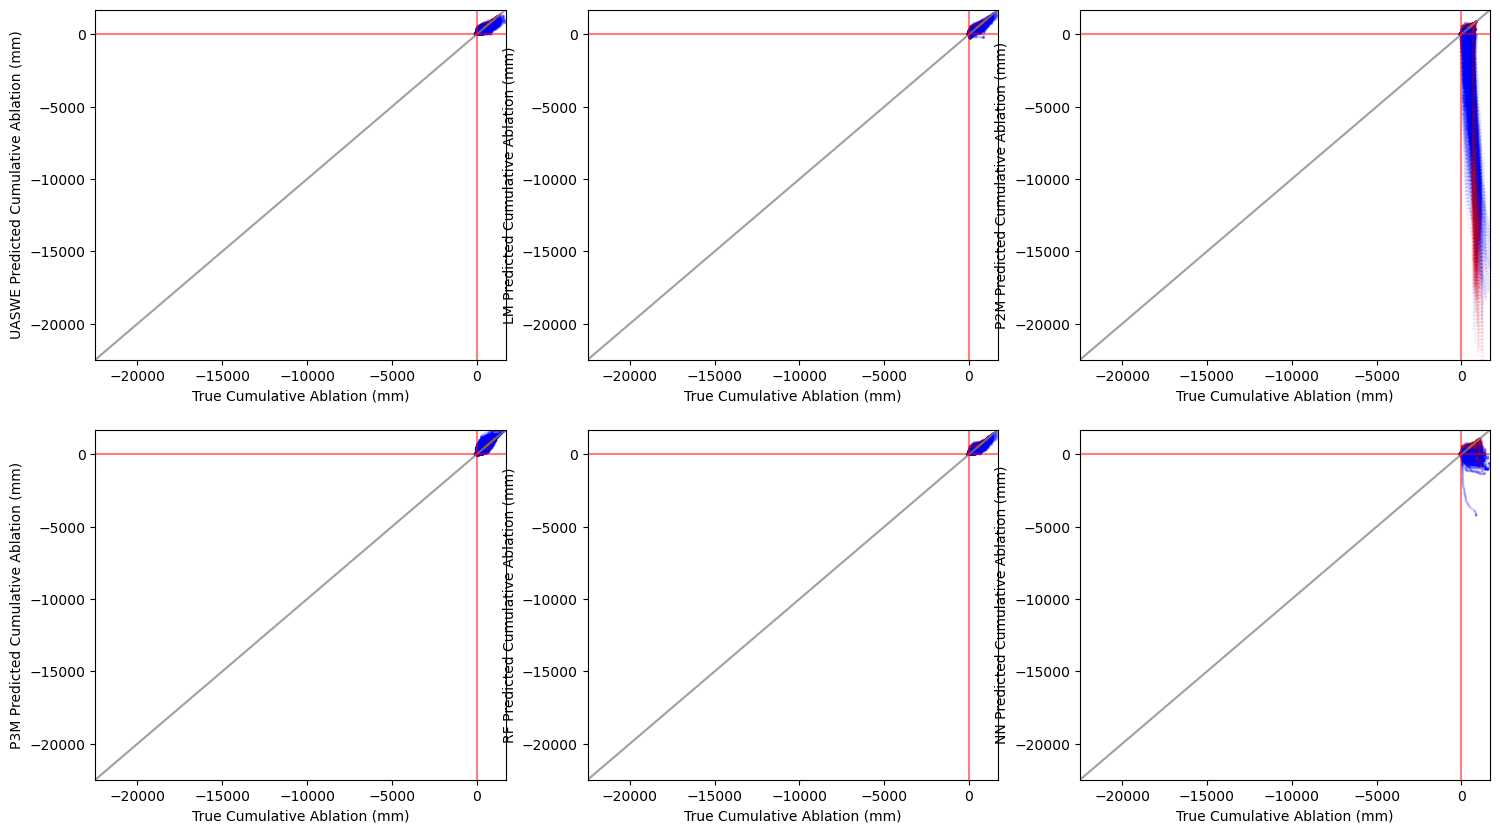

In [25]:
xminimum, xmaximum = min(run_cum_dfs['abl_snw']), max(run_cum_dfs['abl_snw'])
yminimum = min(np.min(run_cum_dfs['pred_acc_abl_UASWE']), np.min(run_cum_dfs['pred_acc_abl_LM']), np.min(run_cum_dfs['pred_acc_abl_P2M']), np.min(run_cum_dfs['pred_acc_abl_P3M']), np.min(run_cum_dfs['pred_acc_abl_RF']), np.min(run_cum_dfs['pred_acc_abl_NN'])) 
ymaximum = max(np.max(run_cum_dfs['pred_acc_abl_UASWE']), np.max(run_cum_dfs['pred_acc_abl_LM']), np.max(run_cum_dfs['pred_acc_abl_P2M']), np.max(run_cum_dfs['pred_acc_abl_P3M']), np.max(run_cum_dfs['pred_acc_abl_RF']), np.max(run_cum_dfs['pred_acc_abl_NN'])) 
minimum, maximum = min(xminimum, yminimum), max(xmaximum, ymaximum)

fig, axes = plt.subplots(2, 3, figsize=(18,10))
col = np.where(run_cum_dfs['pred_acc_snw_UASWE'] == run_cum_dfs['pred_acc_abl_UASWE'], 'r', 'b')
axes[0, 0].scatter(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_UASWE'], s=1, alpha=0.05, c=col)  #, 'bo', markersize=1, alpha=0.1) #row=0, col=0
axes[0, 1].scatter(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_LM'], s=1, alpha=0.05, c=col)  #, 'bo', markersize=1, alpha=0.1) #row=0, col=0
axes[0, 2].scatter(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_P2M'], s=1, alpha=0.05, c=col)  #, 'bo', markersize=1, alpha=0.1) #row=1, col=0
axes[1, 0].scatter(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_P3M'], s=1, alpha=0.05, c=col)  #, 'bo', markersize=1, alpha=0.1) #row=0, col=1
axes[1, 1].scatter(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_RF'], s=1, alpha=0.05, c=col)  #, 'bo', markersize=1, alpha=0.1) #row=1, col=1
axes[1, 2].scatter(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_NN'], s=1, alpha=0.05, c=col)  #, 'bo', markersize=1, alpha=0.1) #row=1, col=1
for i in range(2):
    for j in range(3):
        # if i != 1 or j != 2:
        axes[i,j].axline([0, 0], slope=1, color='grey', alpha=0.75)
        axes[i,j].axhline(0, xmin=minimum, xmax=maximum, color='red', alpha=0.5)
        axes[i,j].axvline(0, ymin=minimum, ymax=maximum, color='red', alpha=0.5)
        axes[i,j].set_xlim(minimum, maximum)
        axes[i,j].set_ylim(minimum, maximum)
        axes[i,j].set_xlabel('True Cumulative Ablation (mm)')
# axes[-1, -1].axis('off')
axes[0, 0].set_ylabel('UASWE Predicted Cumulative Ablation (mm)')
axes[0, 1].set_ylabel('LM Predicted Cumulative Ablation (mm)')
axes[0, 2].set_ylabel('P2M Predicted Cumulative Ablation (mm)')
axes[1, 0].set_ylabel('P3M Predicted Cumulative Ablation (mm)')
axes[1, 1].set_ylabel('RF Predicted Cumulative Ablation (mm)')
axes[1, 2].set_ylabel('NN Predicted Cumulative Ablation (mm)')
plt.savefig(f'{save_dir}{mode}/cum_eval/cum_abl_scatter.png', dpi=300)
# plt.show()

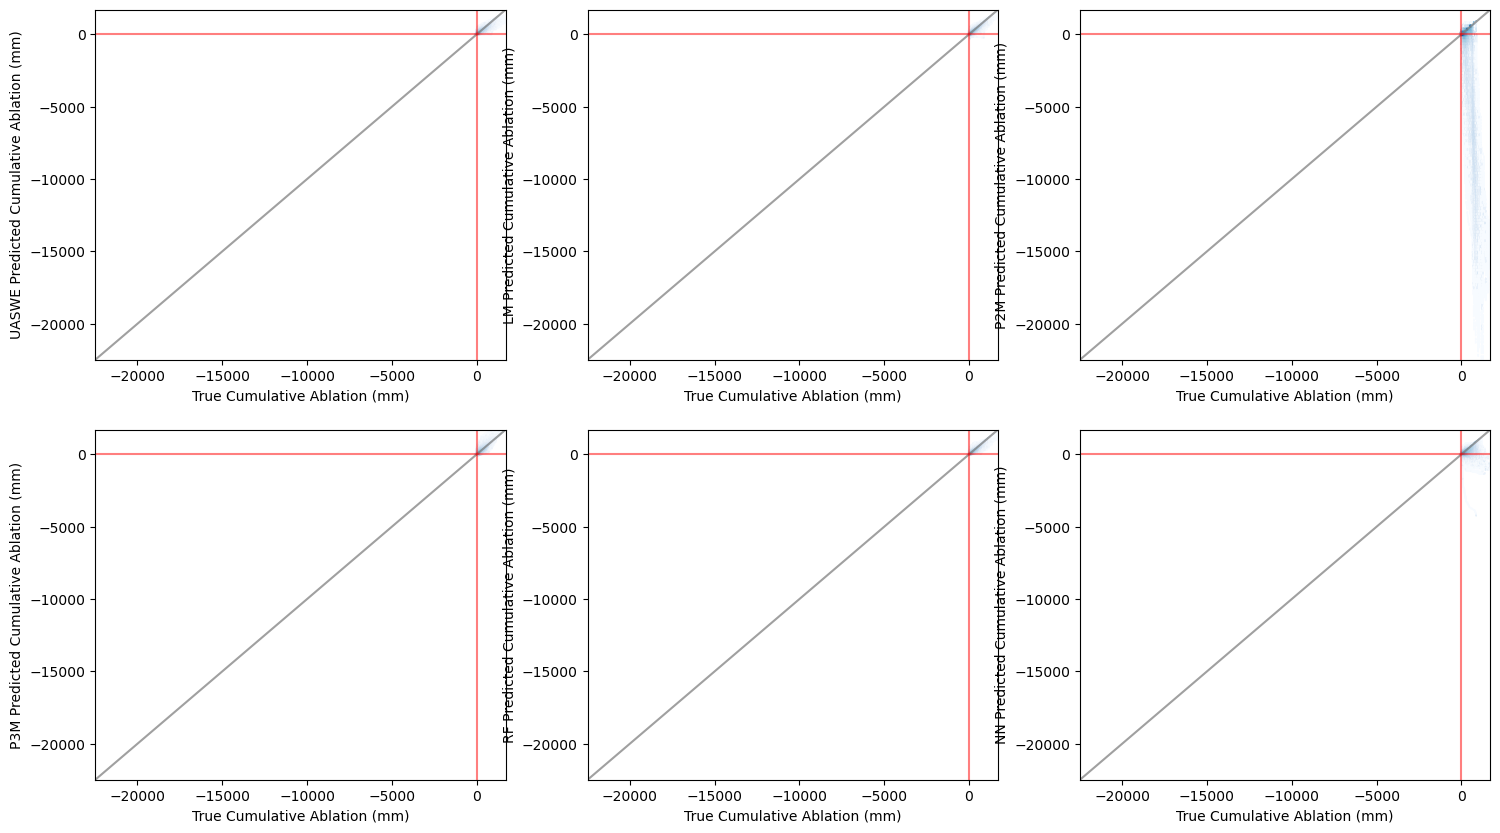

In [26]:
xminimum, xmaximum = min(run_cum_dfs['abl_snw']), max(run_cum_dfs['abl_snw'])
yminimum = min(np.min(run_cum_dfs['pred_acc_abl_UASWE']), np.min(run_cum_dfs['pred_acc_abl_LM']), np.min(run_cum_dfs['pred_acc_abl_P2M']), np.min(run_cum_dfs['pred_acc_abl_P3M']), np.min(run_cum_dfs['pred_acc_abl_RF']), np.min(run_cum_dfs['pred_acc_abl_NN'])) 
ymaximum = max(np.max(run_cum_dfs['pred_acc_abl_UASWE']), np.max(run_cum_dfs['pred_acc_abl_LM']), np.max(run_cum_dfs['pred_acc_abl_P2M']), np.max(run_cum_dfs['pred_acc_abl_P3M']), np.max(run_cum_dfs['pred_acc_abl_RF']), np.max(run_cum_dfs['pred_acc_abl_NN'])) 
minimum, maximum = min(xminimum, yminimum), max(xmaximum, ymaximum)

fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes[0, 0].hexbin(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_UASWE'], gridsize=200, cmap='Blues', bins='log') #row=0, col=0
axes[0, 1].hexbin(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_LM'], gridsize=200, cmap='Blues', bins='log') #row=0, col=0
axes[0, 2].hexbin(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_P2M'], gridsize=200, cmap='Blues', bins='log') #row=1, col=0
axes[1, 0].hexbin(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_P3M'], gridsize=200, cmap='Blues', bins='log') #row=0, col=1
axes[1, 1].hexbin(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_RF'], gridsize=200, cmap='Blues', bins='log') #row=1, col=1
axes[1, 2].hexbin(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_NN'], gridsize=200, cmap='Blues', bins='log') #row=1, col=1
for i in range(2):
    for j in range(3):
        # if i != 1 or j != 2:
        axes[i,j].axline([0, 0], slope=1, color='grey', alpha=0.75)
        axes[i,j].axhline(0, xmin=minimum, xmax=maximum, color='red', alpha=0.5)
        axes[i,j].axvline(0, ymin=minimum, ymax=maximum, color='red', alpha=0.5)
        axes[i,j].set_xlim(minimum, maximum)
        axes[i,j].set_ylim(minimum, maximum)
        axes[i,j].set_xlabel('True Cumulative Ablation (mm)')
# axes[-1, -1].axis('off')
axes[0, 0].set_ylabel('UASWE Predicted Cumulative Ablation (mm)')
axes[0, 1].set_ylabel('LM Predicted Cumulative Ablation (mm)')
axes[0, 2].set_ylabel('P2M Predicted Cumulative Ablation (mm)')
axes[1, 0].set_ylabel('P3M Predicted Cumulative Ablation (mm)')
axes[1, 1].set_ylabel('RF Predicted Cumulative Ablation (mm)')
axes[1, 2].set_ylabel('NN Predicted Cumulative Ablation (mm)')
plt.savefig(f'{save_dir}{mode}/cum_eval/cum_abl_hexplot.png', dpi=300)
# plt.show()

In [34]:
cum_UASWE_r2, cum_UASWE_mse = calculate_r2_mse(run_cum_dfs[['abl_snw', 'pred_acc_abl_UASWE']].dropna()['abl_snw'], 
                                                   run_cum_dfs[['abl_snw', 'pred_acc_abl_UASWE']].dropna()['pred_acc_abl_UASWE'])
cum_LM_r2, cum_LM_mse = calculate_r2_mse(run_cum_dfs[['abl_snw', 'pred_acc_abl_LM']].dropna()['abl_snw'], 
                                             run_cum_dfs[['abl_snw', 'pred_acc_abl_LM']].dropna()['pred_acc_abl_LM'])
cum_P2M_r2, cum_P2M_mse = calculate_r2_mse(run_cum_dfs[['abl_snw', 'pred_acc_abl_P2M']].dropna()['abl_snw'], 
                                               run_cum_dfs[['abl_snw', 'pred_acc_abl_P2M']].dropna()['pred_acc_abl_P2M'])
cum_P3M_r2, cum_P3M_mse = calculate_r2_mse(run_cum_dfs[['abl_snw', 'pred_acc_abl_P3M']].dropna()['abl_snw'], 
                                               run_cum_dfs[['abl_snw', 'pred_acc_abl_P3M']].dropna()['pred_acc_abl_P3M'])
cum_RF_r2, cum_RF_mse = calculate_r2_mse(run_cum_dfs[['abl_snw', 'pred_acc_abl_RF']].dropna()['abl_snw'], 
                                             run_cum_dfs[['abl_snw', 'pred_acc_abl_RF']].dropna()['pred_acc_abl_RF'])
cum_NN_r2, cum_NN_mse = calculate_r2_mse(run_cum_dfs[['abl_snw', 'pred_acc_abl_NN']].dropna()['abl_snw'], 
                                             run_cum_dfs[['abl_snw', 'pred_acc_abl_NN']].dropna()['pred_acc_abl_NN'])

ValueError: too many values to unpack (expected 2)

In [ ]:
print(cum_UASWE_r2, cum_LM_r2, cum_P2M_r2, cum_P3M_r2, cum_RF_r2, cum_NN_r2)
print(cum_UASWE_mse, cum_LM_mse, cum_P2M_mse, cum_P3M_mse, cum_RF_mse, cum_NN_mse)

In [ ]:
len(run_cum_dfs)

In [31]:
run_cum_dfs = run_cum_dfs.dropna(subset=['abl_snw', 'pred_acc_abl_UASWE', 
                                   'pred_acc_abl_LM', 'pred_acc_abl_P2M', 'pred_acc_abl_P3M', 
                                   'pred_acc_abl_RF','pred_acc_abl_NN'
                                  ], how='any', inplace=False)

In [ ]:
np.unique(run_cum_dfs[run_cum_dfs['pred_acc_abl_P2M'] < -1000][['sitecode', 'datetime', 'pr', 'temp', 'pred_acc_abl_P2M', 'pred_swe_P2M']]['sitecode'], return_counts=True)

In [16]:
np.unique(run_cum_dfs[run_cum_dfs['pred_acc_abl_P2M'] < -10000][['sitecode', 'datetime', 'pr', 'temp', 'pred_acc_abl_P2M', 'pred_swe_P2M']]['sitecode'], return_counts=True)

(array(['682_CO_SNTL', '709_CO_SNTL', '737_CO_SNTL', '780_CO_SNTL',
        '840_CO_SNTL', '859_WY_SNTL', '904_CO_SNTL'], dtype=object),
 array([15, 15, 30, 14, 28,  6, 14]))

In [34]:
run_cum_dfs[np.round(run_cum_dfs['pred_swe_P2M'],1) > 2000][['sitecode', 'datetime', 'swe', 'pr', 'temp', 'pred_acc_abl_P2M', 'pred_swe_P2M']].sort_values('pred_swe_P2M')

,sitecode,datetime,swe,pr,temp,pred_acc_abl_P2M,pred_swe_P2M
696968,737_CO_SNTL,2011-06-04 00:00:00+00:00,1226.82,0.00,8.5,-309.256954,2011.056954
696969,737_CO_SNTL,2011-06-05 00:00:00+00:00,1181.10,0.00,9.1,-331.645003,2033.445003
696970,737_CO_SNTL,2011-06-06 00:00:00+00:00,1137.92,0.00,10.6,-353.718859,2055.518859
696971,737_CO_SNTL,2011-06-07 00:00:00+00:00,1087.12,0.00,7.2,-376.061013,2077.861013
696972,737_CO_SNTL,2011-06-08 00:00:00+00:00,1049.02,0.00,8.2,-402.801150,2104.601150
696973,737_CO_SNTL,2011-06-09 00:00:00+00:00,988.06,0.00,6.8,-430.087012,2131.887012
696974,737_CO_SNTL,2011-06-10 00:00:00+00:00,949.96,0.00,5.9,-460.169588,2161.969588
696975,737_CO_SNTL,2011-06-11 00:00:00+00:00,901.70,0.00,8.2,-492.789087,2194.589087
696976,737_CO_SNTL,2011-06-12 00:00:00+00:00,848.36,0.00,7.6,-525.650891,2227.450891
696977,737_CO_SNTL,2011-06-13 00:00:00+00:00,800.10,0.00,7.8,-560.897554,2262.697554


In [18]:
# Phys dAbl with SWE model
run_cum_dfs['pred_acc_abl_P2M'] = run_cum_dfs['pred_acc_abl_P2M'].clip(lower=-7.284402e+02)
run_cum_dfs['pred_swe_P2M'] = run_cum_dfs['pred_swe_P2M'].clip(upper=2.003520e+03)

In [46]:
# Full dAbl with SWE model
run_cum_dfs['pred_acc_abl_P2M'] = run_cum_dfs['pred_acc_abl_P2M'].clip(lower=-3.460402e+02)
run_cum_dfs['pred_swe_P2M'] = run_cum_dfs['pred_swe_P2M'].clip(upper=2.007200e+03)

In [46]:
# Full dAbl with SD model
run_cum_dfs['pred_acc_abl_P2M'] = run_cum_dfs['pred_acc_abl_P2M'].clip(lower=-8.173709e+02)
run_cum_dfs['pred_swe_P2M'] = run_cum_dfs['pred_swe_P2M'].clip(upper=2.003551e+03)

In [27]:
cum_UASWE_r2, cum_UASWE_mae, cum_UASWE_mse = calculate_r2_mse(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_UASWE'])
cum_LM_r2, cum_LM_mae, cum_LM_mse = calculate_r2_mse(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_LM'])
cum_P2M_r2, cum_P2M_mae, cum_P2M_mse = calculate_r2_mse(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_P2M'])
cum_P3M_r2, cum_P3M_mae, cum_P3M_mse = calculate_r2_mse(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_P3M'])
cum_RF_r2, cum_RF_mae, cum_RF_mse = calculate_r2_mse(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_RF'])
cum_NN_r2, cum_NN_mae, cum_NN_mse = calculate_r2_mse(run_cum_dfs['abl_snw'], run_cum_dfs['pred_acc_abl_NN'])

In [32]:
print(np.min(run_cum_dfs['pred_acc_abl_UASWE']), np.max(run_cum_dfs['pred_acc_abl_UASWE']))
print(np.min(run_cum_dfs['pred_acc_abl_LM']), np.max(run_cum_dfs['pred_acc_abl_LM']))
print(np.min(run_cum_dfs['pred_acc_abl_P2M']), np.max(run_cum_dfs['pred_acc_abl_P2M']))
print(np.min(run_cum_dfs['pred_acc_abl_P3M']), np.max(run_cum_dfs['pred_acc_abl_P3M']))
print(np.min(run_cum_dfs['pred_acc_abl_RF']), np.max(run_cum_dfs['pred_acc_abl_RF']))
print(np.min(run_cum_dfs['pred_acc_abl_NN']), np.max(run_cum_dfs['pred_acc_abl_NN']))

0.0 1369.0599999999988
-228.0846859134672 1369.059995820295
-208.2174674243008 1432.5600019902954
-95.30602982849854 1432.5599998564303
-11.734800000000002 1516.6085999999996
-66.53391768038273 1432.5600006449652


In [30]:
print(cum_UASWE_r2, cum_LM_r2, cum_P2M_r2, cum_P3M_r2, cum_RF_r2, cum_NN_r2)
print(cum_UASWE_mse, cum_LM_mse, cum_P2M_mse, cum_P3M_mse, cum_RF_mse, cum_NN_mse)

0.9009917942193538 0.7044555228459148 0.1080133071226631 0.4714173504759458 0.844816766163957 0.9123880354691309
3795.8344234406304 11330.756791257128 34197.506836717315 20265.110360065402 5949.505460595214 3358.91866991635


In [23]:
print(cum_UASWE_r2, cum_LM_r2, cum_P2M_r2, cum_P3M_r2, cum_RF_r2, cum_NN_r2)
print(cum_UASWE_mse, cum_LM_mse, cum_P2M_mse, cum_P3M_mse, cum_RF_mse, cum_NN_mse)

0.8370893465133218 0.7526722222756761 0.8782943263904657 0.9035535460537778 0.9222285916770109 0.9218719682237957
7852.490991292384 11921.498716690337 5866.361009264444 4648.8360002603295 3748.676161846793 3765.8658446190425


In [22]:
print(cum_UASWE_r2, cum_LM_r2, cum_P2M_r2, cum_P3M_r2, cum_RF_r2, cum_NN_r2)
print(cum_UASWE_mse, cum_LM_mse, cum_P2M_mse, cum_P3M_mse, cum_RF_mse, cum_NN_mse)

0.8370893465133218 0.7937812810530913 -1367.6985031405916 0.8400742113588424 0.8977752031129745 0.9135336820531301
7852.490991292384 9939.992247952498 65972927.09642064 7708.616887248034 4927.359134973346 4167.781346377943


In [34]:
print(cum_UASWE_r2, cum_LM_r2, cum_P2M_r2, cum_P3M_r2, cum_RF_r2, cum_NN_r2)
print(cum_UASWE_mse, cum_LM_mse, cum_P2M_mse, cum_P3M_mse, cum_RF_mse, cum_NN_mse)

0.8370893465133218 0.7596740009685544 0.83098106612676 0.8506434920398822 0.8818802998432509 0.865600273143324
7852.490991292384 11584.004495581305 8146.91751086734 7199.164745500331 5693.512741638337 6478.229764516334


In [22]:
print(cum_UASWE_r2, cum_LM_r2, cum_P2M_r2, cum_P3M_r2, cum_RF_r2, cum_NN_r2)
print(cum_UASWE_mse, cum_LM_mse, cum_P2M_mse, cum_P3M_mse, cum_RF_mse, cum_NN_mse)

0.8370893465133218 0.8336348528911873 -1528.8290569287228 0.8586427046979557 0.895896200486642 0.8709047966842904
7852.490991292385 8019.001771690829 73739615.12426479 6813.592998100212 5017.9293394388105 6222.545299276964


In [23]:
print(cum_UASWE_r2, cum_LM_r2, cum_P2M_r2, cum_P3M_r2, cum_RF_r2, cum_NN_r2)
print(cum_UASWE_mse, cum_LM_mse, cum_P2M_mse, cum_P3M_mse, cum_RF_mse, cum_NN_mse)

0.8370893465133218 0.8628494835477488 -3820.1214320159165 0.8424855374517085 0.8686423235393279 0.20670024772984286
7852.490991292384 6610.821157748705 184182685.29008684 7592.388046370859 6331.59924761382 38238.00976039476


In [32]:
# also uaswelike with swe (attempt 2, to try to diagnose nn low r2/high mse)
print(cum_UASWE_r2, cum_LM_r2, cum_P2M_r2, cum_P3M_r2, cum_RF_r2, cum_NN_r2)
print(cum_UASWE_mse, cum_LM_mse, cum_P2M_mse, cum_P3M_mse, cum_RF_mse, cum_NN_mse)

0.8370893465133218 0.8628494835477488 -3820.1214320159165 0.8424855374517085 0.8686423235393279 0.30842401240631734
7852.490991292384 6610.821157748705 184182685.29008684 7592.388046370859 6331.59924761382 33334.80098536101


In [86]:
len(run_cum_dfs)

142715

In [28]:
cum_metrics = {'UA SWE Reg': [cum_UASWE_mse, cum_UASWE_mae, cum_UASWE_r2],
        'Lin Reg': [cum_LM_mse, cum_LM_mae, cum_LM_r2],
        'Quad Reg': [cum_P2M_mse, cum_P2M_mae, cum_P2M_r2],
        # # 'Quad Reg w/ Int': [p2im_mse, p2im_mae, p2im_rsq],
        'Cub Reg': [cum_P3M_mse, cum_P3M_mae, cum_P3M_r2],
        'RF': [cum_RF_mse, cum_RF_mae, cum_RF_r2],
        'NN': [cum_NN_mse, cum_NN_mae, cum_NN_r2]
        # # 'GLM': [glm_mse, glm_mae, glm_rsq]
       }

In [29]:
# Creates pandas DataFrame.
cum_metrics_df = pd.DataFrame(cum_metrics, index=['MSE', 'MAE', 'R2'])

In [30]:
cum_metrics_df

,UA SWE Reg,Lin Reg,Quad Reg,Cub Reg,RF,NN
MSE,7852.490991,6610.821158,5.022406e+06,7592.388046,6331.599248,33470.408025
MAE,50.708176,50.890420,5.534308e+02,51.487701,47.203952,79.622117
R2,0.837089,0.862849,-1.031967e+02,0.842486,0.868642,0.305611


In [31]:
cum_metrics_df.to_csv(f'{save_dir}{mode}/cum_eval/cum_abl_metrics.csv')

##### To delete: Begin

In [ ]:
int_df = pd.merge(run_cum_dfs, 
                  run_cum_dfs.dropna(subset=['abl_snw', 'pred_acc_abl_UASWE', 
                                   'pred_acc_abl_LM', 'pred_acc_abl_P2M', 'pred_acc_abl_P3M', 
                                   'pred_acc_abl_RF','pred_acc_abl_NN'
                                  ], how='any', inplace=False), how='left', indicator=True) 

In [ ]:
int_df[int_df['_merge']=='left_only'][['sitecode','swe','datetime','abl_snw', 'pred_acc_abl_UASWE', 
                                   'pred_acc_abl_LM', 'pred_acc_abl_P2M', 'pred_acc_abl_P3M', 
                                   'pred_acc_abl_RF','pred_acc_abl_NN'
                                  ]]

In [ ]:
calculate_r2_mse(int_df[int_df['_merge']=='left_only']['abl_snw'], int_df[int_df['_merge']=='left_only']['pred_acc_abl_UASWE'])

##### To delete: End

### Climatological

In [32]:
UASWE_metrics = run_cum_dfs[['datetime', 'abl_snw', 'pred_acc_abl_UASWE']].rename(columns={'abl_snw':'Actual', 'pred_acc_abl_UASWE':'Predicted'}).groupby([pd.to_datetime(run_cum_dfs['datetime']).dt.month, pd.to_datetime(run_cum_dfs['datetime']).dt.day]).apply(metrics)
UASWE_metrics.index.names=['Month','Day']
# UASWE_metrics.index.get_level_values('Month')
# UASWE_metrics = UASWE_metrics.drop([7,8,9], level='Month')

LM_metrics = run_cum_dfs[['datetime', 'abl_snw', 'pred_acc_abl_LM']].rename(columns={'abl_snw':'Actual', 'pred_acc_abl_LM':'Predicted'}).groupby([pd.to_datetime(run_cum_dfs['datetime']).dt.month, pd.to_datetime(run_cum_dfs['datetime']).dt.day]).apply(metrics)
LM_metrics.index.names=['Month','Day']
# LM_metrics.index.get_level_values('Month')
# LM_metrics = LM_metrics.drop([7,8,9], level='Month')

P2M_metrics = run_cum_dfs[['datetime', 'abl_snw', 'pred_acc_abl_P2M']].rename(columns={'abl_snw':'Actual', 'pred_acc_abl_P2M':'Predicted'}).groupby([pd.to_datetime(run_cum_dfs['datetime']).dt.month, pd.to_datetime(run_cum_dfs['datetime']).dt.day]).apply(metrics)
P2M_metrics.index.names=['Month','Day']
# P2M_metrics.index.get_level_values('Month')
# P2M_metrics = P2M_metrics.drop([7,8,9], level='Month')

P3M_metrics = run_cum_dfs[['datetime', 'abl_snw', 'pred_acc_abl_P3M']].rename(columns={'abl_snw':'Actual', 'pred_acc_abl_P3M':'Predicted'}).groupby([pd.to_datetime(run_cum_dfs['datetime']).dt.month, pd.to_datetime(run_cum_dfs['datetime']).dt.day]).apply(metrics)
P3M_metrics.index.names=['Month','Day']
# P3M_metrics.index.get_level_values('Month')
# P3M_metrics = P3M_metrics.drop([7,8,9], level='Month')

RF_metrics = run_cum_dfs[['datetime', 'abl_snw', 'pred_acc_abl_RF']].rename(columns={'abl_snw':'Actual', 'pred_acc_abl_RF':'Predicted'}).groupby([pd.to_datetime(run_cum_dfs['datetime']).dt.month, pd.to_datetime(run_cum_dfs['datetime']).dt.day]).apply(metrics)
RF_metrics.index.names=['Month','Day']
# RF_metrics.index.get_level_values('Month')
# RF_metrics = RF_metrics.drop([7,8,9], level='Month')

NN_metrics = run_cum_dfs[['datetime', 'abl_snw', 'pred_acc_abl_NN']].rename(columns={'abl_snw':'Actual', 'pred_acc_abl_NN':'Predicted'}).groupby([pd.to_datetime(run_cum_dfs['datetime']).dt.month, pd.to_datetime(run_cum_dfs['datetime']).dt.day]).apply(metrics)
NN_metrics.index.names=['Month','Day']
# NN_metrics.index.get_level_values('Month')
# NN_metrics = NN_metrics.drop([7,8,9], level='Month')

In [33]:
UASWE_metrics['date'] = UASWE_metrics.index.get_level_values('Month').astype(str) + '-' + UASWE_metrics.index.get_level_values('Day').astype(str)
LM_metrics['date'] = LM_metrics.index.get_level_values('Month').astype(str) + '-' + LM_metrics.index.get_level_values('Day').astype(str)
P2M_metrics['date'] = P2M_metrics.index.get_level_values('Month').astype(str) + '-' + P2M_metrics.index.get_level_values('Day').astype(str)
P3M_metrics['date'] = P3M_metrics.index.get_level_values('Month').astype(str) + '-' + P3M_metrics.index.get_level_values('Day').astype(str)
RF_metrics['date'] = RF_metrics.index.get_level_values('Month').astype(str) + '-' + RF_metrics.index.get_level_values('Day').astype(str)
NN_metrics['date'] = NN_metrics.index.get_level_values('Month').astype(str) + '-' + NN_metrics.index.get_level_values('Day').astype(str)

<Figure size 640x480 with 0 Axes>

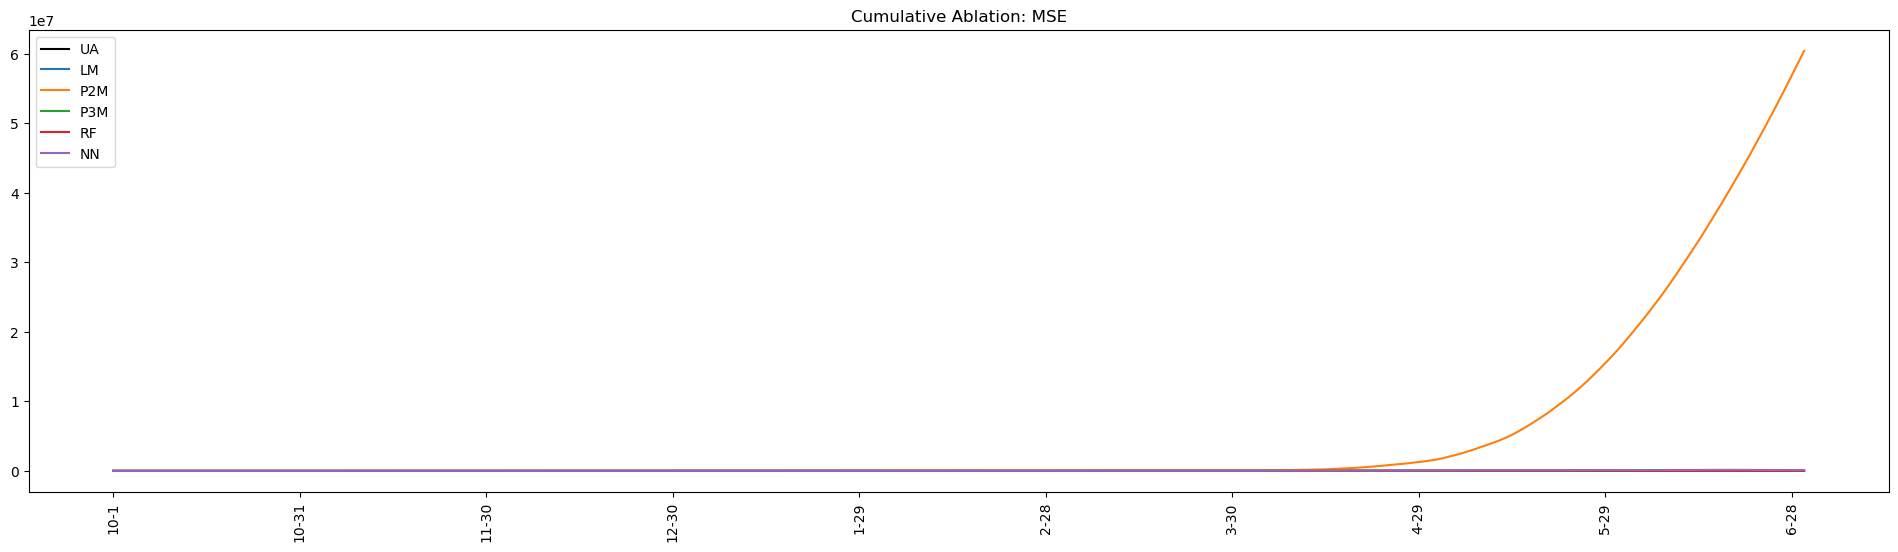

<Figure size 640x480 with 0 Axes>

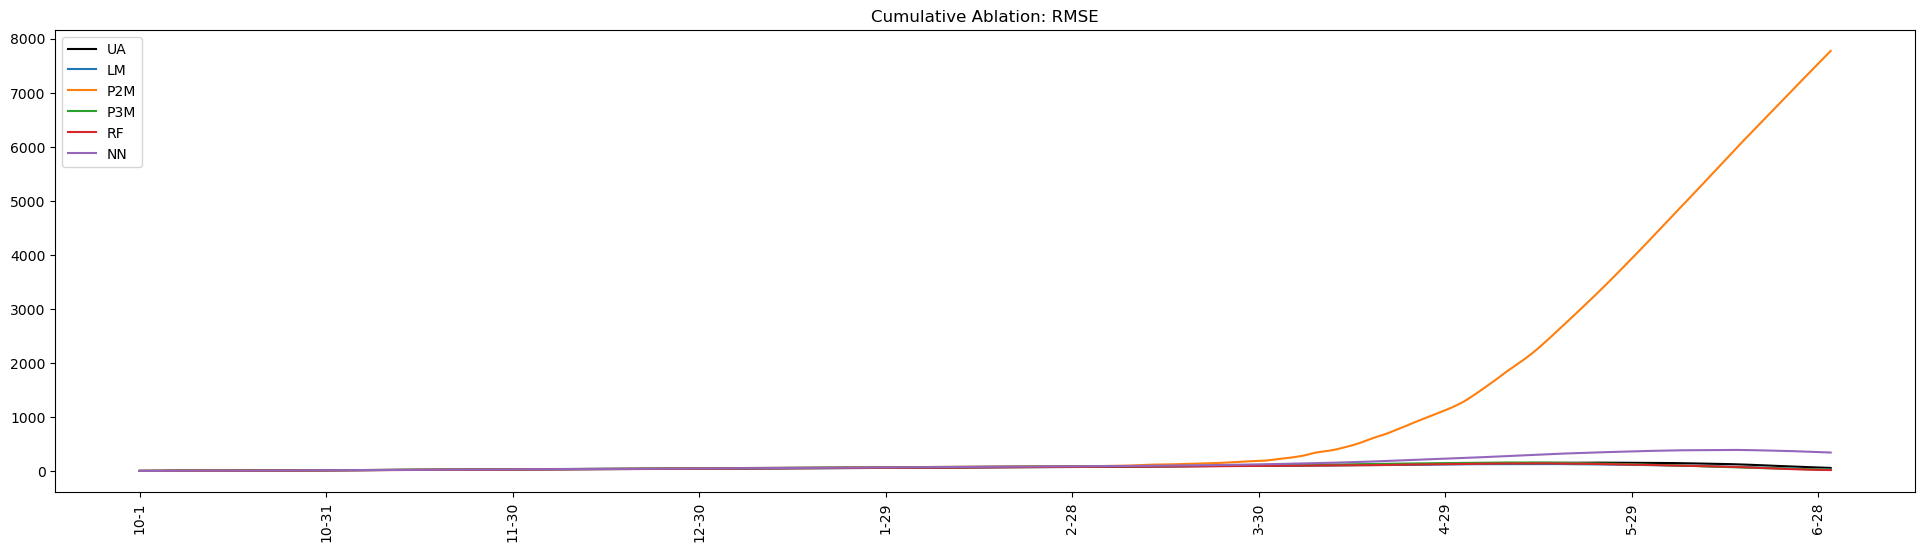

<Figure size 640x480 with 0 Axes>

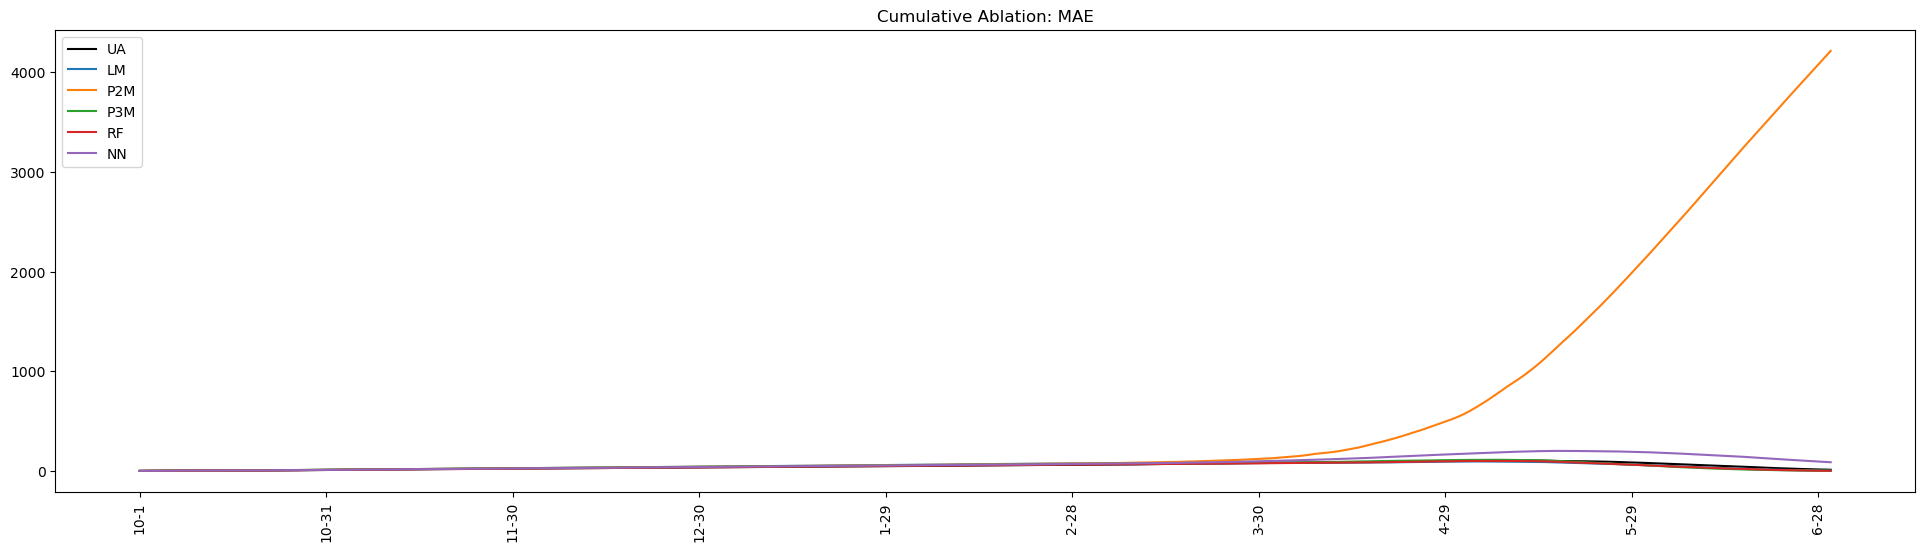

<Figure size 640x480 with 0 Axes>

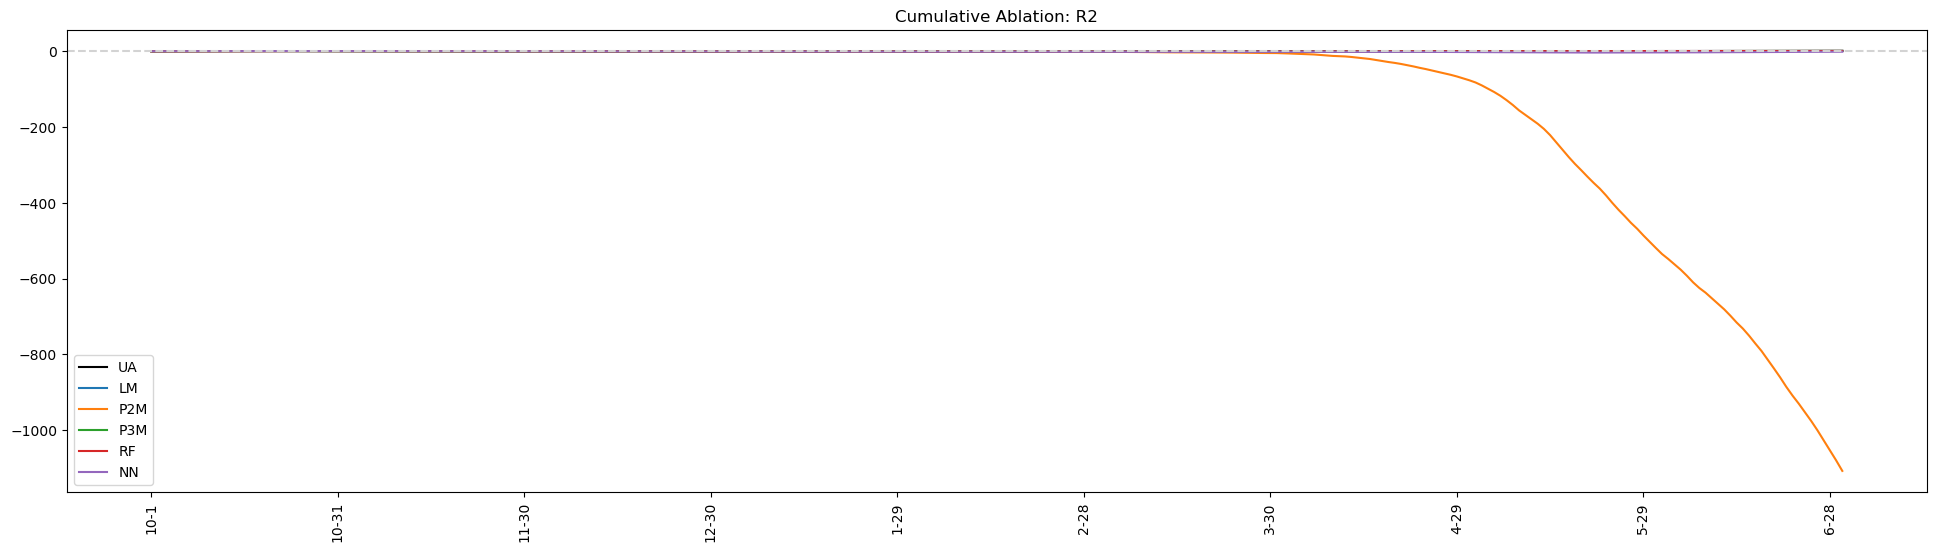

In [34]:
plt.clf()
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values, pd.concat([UASWE_metrics[181:]['mse'], UASWE_metrics[:181]['mse']]).values, label='UA', color='black')
ax.plot(pd.concat([LM_metrics[181:]['date'], LM_metrics[:181]['date']]).values, pd.concat([LM_metrics[181:]['mse'], LM_metrics[:181]['mse']]).values, label='LM')
ax.plot(pd.concat([P2M_metrics[181:]['date'], P2M_metrics[:181]['date']]).values, pd.concat([P2M_metrics[181:]['mse'], P2M_metrics[:181]['mse']]).values, label='P2M')
ax.plot(pd.concat([P3M_metrics[181:]['date'], P3M_metrics[:181]['date']]).values, pd.concat([P3M_metrics[181:]['mse'], P3M_metrics[:181]['mse']]).values, label='P3M')
ax.plot(pd.concat([RF_metrics[181:]['date'], RF_metrics[:181]['date']]).values, pd.concat([RF_metrics[181:]['mse'], RF_metrics[:181]['mse']]).values, label='RF')
ax.plot(pd.concat([NN_metrics[181:]['date'], NN_metrics[:181]['date']]).values, pd.concat([NN_metrics[181:]['mse'], NN_metrics[:181]['mse']]).values, label='NN')
ax.set_xticks(ax.get_xticks()[::30])   # tick at every 30th entry
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values)[::30])    # tick labels at every 30th entry
ax.set_title('Cumulative Ablation: MSE')
ax.legend()
# ax.axhline(200, linestyle='--', color='lightgrey')
plt.savefig(f'{save_dir}{mode}/cum_eval/cum_abl_mse_climat.png', dpi=300)
plt.show()

plt.clf()
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values, pd.concat([UASWE_metrics[181:]['rmse'], UASWE_metrics[:181]['rmse']]).values, label='UA', color='black')
ax.plot(pd.concat([LM_metrics[181:]['date'], LM_metrics[:181]['date']]).values, pd.concat([LM_metrics[181:]['rmse'], LM_metrics[:181]['rmse']]).values, label='LM')
ax.plot(pd.concat([P2M_metrics[181:]['date'], P2M_metrics[:181]['date']]).values, pd.concat([P2M_metrics[181:]['rmse'], P2M_metrics[:181]['rmse']]).values, label='P2M')
ax.plot(pd.concat([P3M_metrics[181:]['date'], P3M_metrics[:181]['date']]).values, pd.concat([P3M_metrics[181:]['rmse'], P3M_metrics[:181]['rmse']]).values, label='P3M')
ax.plot(pd.concat([RF_metrics[181:]['date'], RF_metrics[:181]['date']]).values, pd.concat([RF_metrics[181:]['rmse'], RF_metrics[:181]['rmse']]).values, label='RF')
ax.plot(pd.concat([NN_metrics[181:]['date'], NN_metrics[:181]['date']]).values, pd.concat([NN_metrics[181:]['rmse'], NN_metrics[:181]['rmse']]).values, label='NN')
ax.set_xticks(ax.get_xticks()[::30])   # tick at every 30th entry
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values)[::30])    # tick labels at every 30th entry
ax.set_title('Cumulative Ablation: RMSE')
ax.legend()
# ax.axhline(200, linestyle='--', color='lightgrey')
plt.savefig(f'{save_dir}{mode}/cum_eval/cum_abl_rmse_climat.png', dpi=300)
plt.show()

plt.clf()
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values, pd.concat([UASWE_metrics[181:]['mae'], UASWE_metrics[:181]['mae']]).values, label='UA', color='black')
ax.plot(pd.concat([LM_metrics[181:]['date'], LM_metrics[:181]['date']]).values, pd.concat([LM_metrics[181:]['mae'], LM_metrics[:181]['mae']]).values, label='LM')
ax.plot(pd.concat([P2M_metrics[181:]['date'], P2M_metrics[:181]['date']]).values, pd.concat([P2M_metrics[181:]['mae'], P2M_metrics[:181]['mae']]).values, label='P2M')
ax.plot(pd.concat([P3M_metrics[181:]['date'], P3M_metrics[:181]['date']]).values, pd.concat([P3M_metrics[181:]['mae'], P3M_metrics[:181]['mae']]).values, label='P3M')
ax.plot(pd.concat([RF_metrics[181:]['date'], RF_metrics[:181]['date']]).values, pd.concat([RF_metrics[181:]['mae'], RF_metrics[:181]['mae']]).values, label='RF')
ax.plot(pd.concat([NN_metrics[181:]['date'], NN_metrics[:181]['date']]).values, pd.concat([NN_metrics[181:]['mae'], NN_metrics[:181]['mae']]).values, label='NN')
ax.set_xticks(ax.get_xticks()[::30])   # tick at every 30th entry
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values)[::30])    # tick labels at every 30th entry
ax.set_title('Cumulative Ablation: MAE')
ax.legend()
# ax.axhline(200, linestyle='--', color='lightgrey')
plt.savefig(f'{save_dir}{mode}/cum_eval/cum_abl_mae_climat.png', dpi=300)
plt.show()

plt.clf()
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values, pd.concat([UASWE_metrics[181:]['r2'], UASWE_metrics[:181]['r2']]).values, label='UA', color='black')
ax.plot(pd.concat([LM_metrics[181:]['date'], LM_metrics[:181]['date']]).values, pd.concat([LM_metrics[181:]['r2'], LM_metrics[:181]['r2']]).values, label='LM')
ax.plot(pd.concat([P2M_metrics[181:]['date'], P2M_metrics[:181]['date']]).values, pd.concat([P2M_metrics[181:]['r2'], P2M_metrics[:181]['r2']]).values, label='P2M')
ax.plot(pd.concat([P3M_metrics[181:]['date'], P3M_metrics[:181]['date']]).values, pd.concat([P3M_metrics[181:]['r2'], P3M_metrics[:181]['r2']]).values, label='P3M')
ax.plot(pd.concat([RF_metrics[181:]['date'], RF_metrics[:181]['date']]).values, pd.concat([RF_metrics[181:]['r2'], RF_metrics[:181]['r2']]).values, label='RF')
ax.plot(pd.concat([NN_metrics[181:]['date'], NN_metrics[:181]['date']]).values, pd.concat([NN_metrics[181:]['r2'], NN_metrics[:181]['r2']]).values, label='NN')
ax.set_xticks(ax.get_xticks()[::30])   # tick at every 30th entry
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values)[::30])    # tick labels at every 30th entry
ax.set_title('Cumulative Ablation: R2')
ax.legend()
# ax.set_ylim(-1, 1)
ax.axhline(0, linestyle='--', color='lightgrey')
plt.savefig(f'{save_dir}{mode}/cum_eval/cum_abl_r2_climat.png', dpi=300)
plt.show()

### Site-Year

In [35]:
mse_acc_abl_UASWE, mse_acc_abl_LM, mse_acc_abl_P2M, mse_acc_abl_P3M, mse_acc_abl_RF, mse_acc_abl_NN = [], [], [], [], [], []
mae_acc_abl_UASWE, mae_acc_abl_LM, mae_acc_abl_P2M, mae_acc_abl_P3M, mae_acc_abl_RF, mae_acc_abl_NN = [], [], [], [], [], []
r2_acc_abl_UASWE, r2_acc_abl_LM, r2_acc_abl_P2M, r2_acc_abl_P3M, r2_acc_abl_RF, r2_acc_abl_NN = [], [], [], [], [], []

In [36]:
for site in np.unique(run_cum_dfs['sitecode']):
    for wy in np.unique(run_cum_dfs['water_year']):
        site_wy_df = run_cum_dfs[(run_cum_dfs['sitecode'] == site) & (run_cum_dfs['water_year'] == wy)]
        
        if not site_wy_df.empty:
            # site_wy_df_clean = site_wy_df.dropna(subset=['abl_snw', 'pred_acc_abl_UASWE', 
            #                                  'pred_acc_abl_LM', 'pred_acc_abl_P2M', 'pred_acc_abl_P3M', 
            #                                  'pred_acc_abl_RF','pred_acc_abl_NN'
            #                                 ], how='any', inplace=False)
            # site_wy_df_clean = site_wy_df_clean[~pd.to_datetime(site_wy_df_clean['datetime']).dt.month.isin([7, 8, 9])]    # evaluate only on snow season
            
            mse_acc_abl_UASWE.append(mean_squared_error(site_wy_df['abl_snw'], site_wy_df['pred_acc_abl_UASWE'], squared=True))
            mse_acc_abl_LM.append(mean_squared_error(site_wy_df['abl_snw'], site_wy_df['pred_acc_abl_LM'], squared=True))
            mse_acc_abl_P2M.append(mean_squared_error(site_wy_df['abl_snw'], site_wy_df['pred_acc_abl_P2M'], squared=True))
            mse_acc_abl_P3M.append(mean_squared_error(site_wy_df['abl_snw'], site_wy_df['pred_acc_abl_P3M'], squared=True))
            mse_acc_abl_RF.append(mean_squared_error(site_wy_df['abl_snw'], site_wy_df['pred_acc_abl_RF'], squared=True))
            mse_acc_abl_NN.append(mean_squared_error(site_wy_df['abl_snw'], site_wy_df['pred_acc_abl_NN'], squared=True))                    
            mae_acc_abl_UASWE.append(np.mean(abs(site_wy_df['pred_acc_abl_UASWE'] - site_wy_df['abl_snw'])))
            mae_acc_abl_LM.append(np.mean(abs(site_wy_df['pred_acc_abl_LM'] - site_wy_df['abl_snw'])))
            mae_acc_abl_P2M.append(np.mean(abs(site_wy_df['pred_acc_abl_P2M'] - site_wy_df['abl_snw'])))
            mae_acc_abl_P3M.append(np.mean(abs(site_wy_df['pred_acc_abl_P3M'] - site_wy_df['abl_snw'])))
            mae_acc_abl_RF.append(np.mean(abs(site_wy_df['pred_acc_abl_RF'] - site_wy_df['abl_snw'])))
            mae_acc_abl_NN.append(np.mean(abs(site_wy_df['pred_acc_abl_NN'] - site_wy_df['abl_snw'])))
            r2_acc_abl_UASWE.append(r2_score(site_wy_df['abl_snw'], site_wy_df['pred_acc_abl_UASWE']))
            r2_acc_abl_LM.append(r2_score(site_wy_df['abl_snw'], site_wy_df['pred_acc_abl_LM']))
            r2_acc_abl_P2M.append(r2_score(site_wy_df['abl_snw'], site_wy_df['pred_acc_abl_P2M']))
            r2_acc_abl_P3M.append(r2_score(site_wy_df['abl_snw'], site_wy_df['pred_acc_abl_P3M']))
            r2_acc_abl_RF.append(r2_score(site_wy_df['abl_snw'], site_wy_df['pred_acc_abl_RF']))
            r2_acc_abl_NN.append(r2_score(site_wy_df['abl_snw'], site_wy_df['pred_acc_abl_NN']))


In [37]:
cum_metrics_med = {'UA SWE Reg': [np.median(mse_acc_abl_UASWE), np.median(mae_acc_abl_UASWE), np.median(r2_acc_abl_UASWE)],
                   'Lin Reg': [np.median(mse_acc_abl_LM), np.median(mae_acc_abl_LM), np.median(r2_acc_abl_LM)],
                   'Quad Reg': [np.median(mse_acc_abl_P2M), np.median(mae_acc_abl_P2M), np.median(r2_acc_abl_P2M)],
                   # 'Quad Reg w/ Int': [p2im_mse, p2im_mae, p2im_rsq],
                   'Cub Reg': [np.median(mse_acc_abl_P3M), np.median(mae_acc_abl_P3M), np.median(r2_acc_abl_P3M)],
                   'RF': [np.median(mse_acc_abl_RF), np.median(mae_acc_abl_RF), np.median(r2_acc_abl_RF)],
                   'NN': [np.median(mse_acc_abl_NN), np.median(mae_acc_abl_NN), np.median(r2_acc_abl_NN)]
                   # 'GLM': [glm_mse, glm_mae, glm_rsq]
                  }
cum_metrics_mean = {'UA SWE Reg': [np.mean(mse_acc_abl_UASWE), np.mean(mae_acc_abl_UASWE), np.mean(r2_acc_abl_UASWE)],
               'Lin Reg': [np.mean(mse_acc_abl_LM), np.mean(mae_acc_abl_LM), np.mean(r2_acc_abl_LM)],
               'Quad Reg': [np.mean(mse_acc_abl_P2M), np.mean(mae_acc_abl_P2M), np.mean(r2_acc_abl_P2M)],
               # 'Quad Reg w/ Int': [p2im_mse, p2im_mae, p2im_rsq],
               'Cub Reg': [np.mean(mse_acc_abl_P3M), np.mean(mae_acc_abl_P3M), np.mean(r2_acc_abl_P3M)],
               'RF': [np.mean(mse_acc_abl_RF), np.mean(mae_acc_abl_RF), np.mean(r2_acc_abl_RF)],
               'NN': [np.mean(mse_acc_abl_NN), np.mean(mae_acc_abl_NN), np.mean(r2_acc_abl_NN)]
               # 'GLM': [glm_mse, glm_mae, glm_rsq]
              }
cum_metrics_std = {'UA SWE Reg': [np.std(mse_acc_abl_UASWE), np.std(mae_acc_abl_UASWE), np.std(r2_acc_abl_UASWE)],
               'Lin Reg': [np.std(mse_acc_abl_LM), np.std(mae_acc_abl_LM), np.std(r2_acc_abl_LM)],
               'Quad Reg': [np.std(mse_acc_abl_P2M), np.std(mae_acc_abl_P2M), np.std(r2_acc_abl_P2M)],
               # 'Quad Reg w/ Int': [p2im_mse, p2im_mae, p2im_rsq],
               'Cub Reg': [np.std(mse_acc_abl_P3M), np.std(mae_acc_abl_P3M), np.std(r2_acc_abl_P3M)],
               'RF': [np.std(mse_acc_abl_RF), np.std(mae_acc_abl_RF), np.std(r2_acc_abl_RF)],
               'NN': [np.std(mse_acc_abl_NN), np.std(mae_acc_abl_NN), np.std(r2_acc_abl_NN)]
               # 'GLM': [glm_mse, glm_mae, glm_rsq]
              }

In [38]:
cum_abl_means = pd.DataFrame(cum_metrics_med, index=['MSE','MAE','R2'])

In [39]:
cum_abl_meds = pd.DataFrame(cum_metrics_mean, index=['MSE','MAE','R2'])

In [40]:
cum_abl_stds = pd.DataFrame(cum_metrics_std, index=['MSE','MAE','R2'])

In [41]:
cum_abl_means.to_csv(f'{save_dir}{mode}/cum_eval/cum_abl_means.csv')
cum_abl_meds.to_csv(f'{save_dir}{mode}/cum_eval/cum_abl_meds.csv')
cum_abl_stds.to_csv(f'{save_dir}{mode}/cum_eval/cum_abl_stds.csv')

In [42]:
cum_abl_means

,UA SWE Reg,Lin Reg,Quad Reg,Cub Reg,RF,NN
MSE,3420.517570,3660.735172,7669.935136,3802.682938,3061.528330,5992.207348
MAE,40.095606,42.438658,61.800523,43.735632,37.683738,53.260221
R2,0.899512,0.903065,0.753499,0.900439,0.917028,0.815699


In [43]:
cum_abl_meds

,UA SWE Reg,Lin Reg,Quad Reg,Cub Reg,RF,NN
MSE,7852.490991,6610.821158,5.022406e+06,7592.388046,6331.599248,33470.408025
MAE,50.708176,50.890420,5.534308e+02,51.487701,47.203952,79.622117
R2,0.837803,0.854442,-6.619278e+01,0.826614,0.867070,0.507158


# SWE Evaluation

Load dataframes including model predictions across folds and remove summer months

In [15]:
run_swe_dfs_lst = []

In [16]:
for k in range(nfolds):
    run_fold_cum_dir = f'{run_root_dir}k={k}/{mode}/ALL_SITES_WY_DF.csv'
    run_fold_cum_df = pd.read_csv(run_fold_cum_dir, index_col=0)
    run_swe_dfs_lst.append(run_fold_cum_df)

In [17]:
run_swe_dfs = pd.concat(run_swe_dfs_lst)

In [18]:
run_swe_dfs = run_swe_dfs[~pd.to_datetime(run_swe_dfs['datetime']).dt.month.isin([7, 8, 9])]

## Aggregate

Compute performance metrics based on aggregating across all sites and dates.

In [25]:
swe_UASWE_r2, swe_UASWE_mae, swe_UASWE_mse = calculate_r2_mae_mse(run_swe_dfs['swe'], run_swe_dfs['UASWE'])
swe_LM_r2, swe_LM_mae, swe_LM_mse = calculate_r2_mae_mse(run_swe_dfs['swe'], run_swe_dfs['pred_swe_LM'])
swe_P2M_r2, swe_P2M_mae, swe_P2M_mse = calculate_r2_mae_mse(run_swe_dfs['swe'], run_swe_dfs['pred_swe_P2M'])
swe_P3M_r2, swe_P3M_mae, swe_P3M_mse = calculate_r2_mae_mse(run_swe_dfs['swe'], run_swe_dfs['pred_swe_P3M'])
swe_RF_r2, swe_RF_mae, swe_RF_mse = calculate_r2_mae_mse(run_swe_dfs['swe'], run_swe_dfs['pred_swe_RF'])
swe_NN_r2, swe_NN_mae, swe_NN_mse = calculate_r2_mae_mse(run_swe_dfs['swe'], run_swe_dfs['pred_swe_NN'])

In [27]:
swe_metrics = {'UA SWE Reg': [swe_UASWE_mse, swe_UASWE_mae, swe_UASWE_r2],
        'Lin Reg': [swe_LM_mse, swe_LM_mae, swe_LM_r2],
        'Quad Reg': [swe_P2M_mse, swe_P2M_mae, swe_P2M_r2],
        'Cub Reg': [swe_P3M_mse, swe_P3M_mae, swe_P3M_r2],
        'RF': [swe_RF_mse, swe_RF_mae, swe_RF_r2],
        'NN': [swe_NN_mse, swe_NN_mae, swe_NN_r2]
       }

In [28]:
# Creates pandas DataFrame.
swe_metrics_df = pd.DataFrame(swe_metrics, index=['MSE', 'MAE', 'R2'])

In [29]:
swe_metrics_df

,UA SWE Reg,Lin Reg,Quad Reg,Cub Reg,RF,NN
MSE,5202.998678,11737.491861,11202.080234,8495.784553,3852.079771,3520.621769
MAE,39.953538,69.401056,67.561857,58.044450,36.845532,33.702984
R2,0.855604,0.674257,0.689115,0.764222,0.893096,0.902294


In [55]:
swe_metrics_df.to_csv(f'{save_dir}{mode}/swe_eval/aggregate_scheme/swe_abl_metrics.csv')

## Climatological

Compute metrics for each day, across sites and years.

In [30]:
UASWE_metrics = run_swe_dfs[['datetime', 'swe', 'UASWE']].rename(columns={'swe':'Actual', 'UASWE':'Predicted'}).groupby([pd.to_datetime(run_swe_dfs['datetime']).dt.month, pd.to_datetime(run_swe_dfs['datetime']).dt.day])


In [31]:
run_noswe_dfs = run_cum_dfs.copy()

In [32]:
UASWE_metrics = run_swe_dfs[['datetime', 'swe', 'UASWE']].rename(columns={'swe':'Actual', 'UASWE':'Predicted'}).groupby([pd.to_datetime(run_swe_dfs['datetime']).dt.month, pd.to_datetime(run_swe_dfs['datetime']).dt.day]).apply(metrics)
UASWE_metrics.index.names=['Month','Day']
# UASWE_metrics.index.get_level_values('Month')
# UASWE_metrics = UASWE_metrics.drop([7,8,9], level='Month')

LM_metrics = run_swe_dfs[['datetime', 'swe', 'pred_swe_LM']].rename(columns={'swe':'Actual', 'pred_swe_LM':'Predicted'}).groupby([pd.to_datetime(run_swe_dfs['datetime']).dt.month, pd.to_datetime(run_swe_dfs['datetime']).dt.day]).apply(metrics)
LM_metrics.index.names=['Month','Day']
# LM_metrics.index.get_level_values('Month')
# LM_metrics = LM_metrics.drop([7,8,9], level='Month')

P2M_metrics = run_swe_dfs[['datetime', 'swe', 'pred_swe_P2M']].rename(columns={'swe':'Actual', 'pred_swe_P2M':'Predicted'}).groupby([pd.to_datetime(run_swe_dfs['datetime']).dt.month, pd.to_datetime(run_swe_dfs['datetime']).dt.day]).apply(metrics)
P2M_metrics.index.names=['Month','Day']
# P2M_metrics.index.get_level_values('Month')
# P2M_metrics = P2M_metrics.drop([7,8,9], level='Month')

P3M_metrics = run_swe_dfs[['datetime', 'swe', 'pred_swe_P3M']].rename(columns={'swe':'Actual', 'pred_swe_P3M':'Predicted'}).groupby([pd.to_datetime(run_swe_dfs['datetime']).dt.month, pd.to_datetime(run_swe_dfs['datetime']).dt.day]).apply(metrics)
P3M_metrics.index.names=['Month','Day']
# P3M_metrics.index.get_level_values('Month')
# P3M_metrics = P3M_metrics.drop([7,8,9], level='Month')

RF_metrics = run_swe_dfs[['datetime', 'swe', 'pred_swe_RF']].rename(columns={'swe':'Actual', 'pred_swe_RF':'Predicted'}).groupby([pd.to_datetime(run_swe_dfs['datetime']).dt.month, pd.to_datetime(run_swe_dfs['datetime']).dt.day]).apply(metrics)
RF_metrics.index.names=['Month','Day']
# RF_metrics.index.get_level_values('Month')
# RF_metrics = RF_metrics.drop([7,8,9], level='Month')

NN_metrics = run_swe_dfs[['datetime', 'swe', 'pred_swe_NN']].rename(columns={'swe':'Actual', 'pred_swe_NN':'Predicted'}).groupby([pd.to_datetime(run_swe_dfs['datetime']).dt.month, pd.to_datetime(run_swe_dfs['datetime']).dt.day]).apply(metrics)
NN_metrics.index.names=['Month','Day']
# NN_metrics.index.get_level_values('Month')
# NN_metrics = NN_metrics.drop([7,8,9], level='Month')

In [34]:
UASWE_metrics['date'] = UASWE_metrics.index.get_level_values('Month').astype(str) + '-' + UASWE_metrics.index.get_level_values('Day').astype(str)
LM_metrics['date'] = LM_metrics.index.get_level_values('Month').astype(str) + '-' + LM_metrics.index.get_level_values('Day').astype(str)
P2M_metrics['date'] = P2M_metrics.index.get_level_values('Month').astype(str) + '-' + P2M_metrics.index.get_level_values('Day').astype(str)
P3M_metrics['date'] = P3M_metrics.index.get_level_values('Month').astype(str) + '-' + P3M_metrics.index.get_level_values('Day').astype(str)
RF_metrics['date'] = RF_metrics.index.get_level_values('Month').astype(str) + '-' + RF_metrics.index.get_level_values('Day').astype(str)
NN_metrics['date'] = NN_metrics.index.get_level_values('Month').astype(str) + '-' + NN_metrics.index.get_level_values('Day').astype(str)

<Figure size 640x480 with 0 Axes>

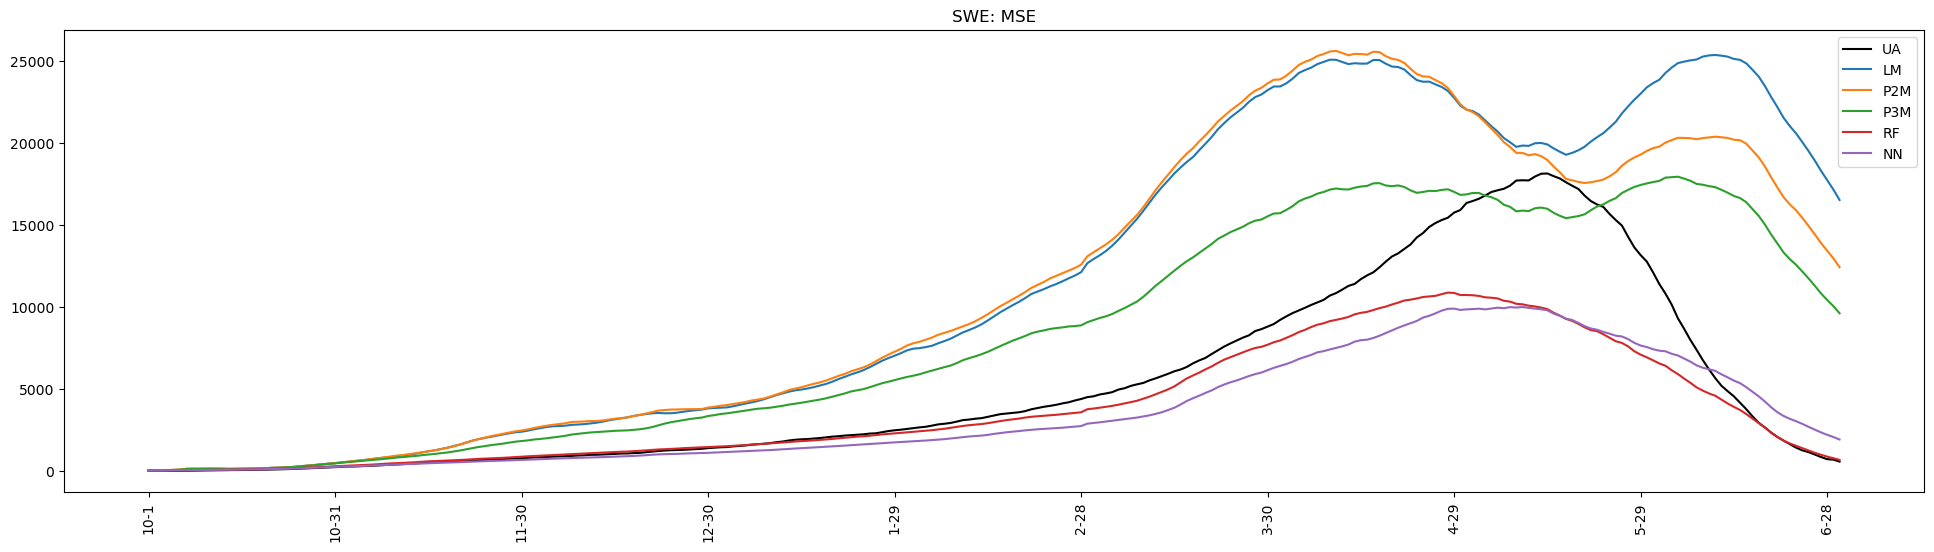

<Figure size 640x480 with 0 Axes>

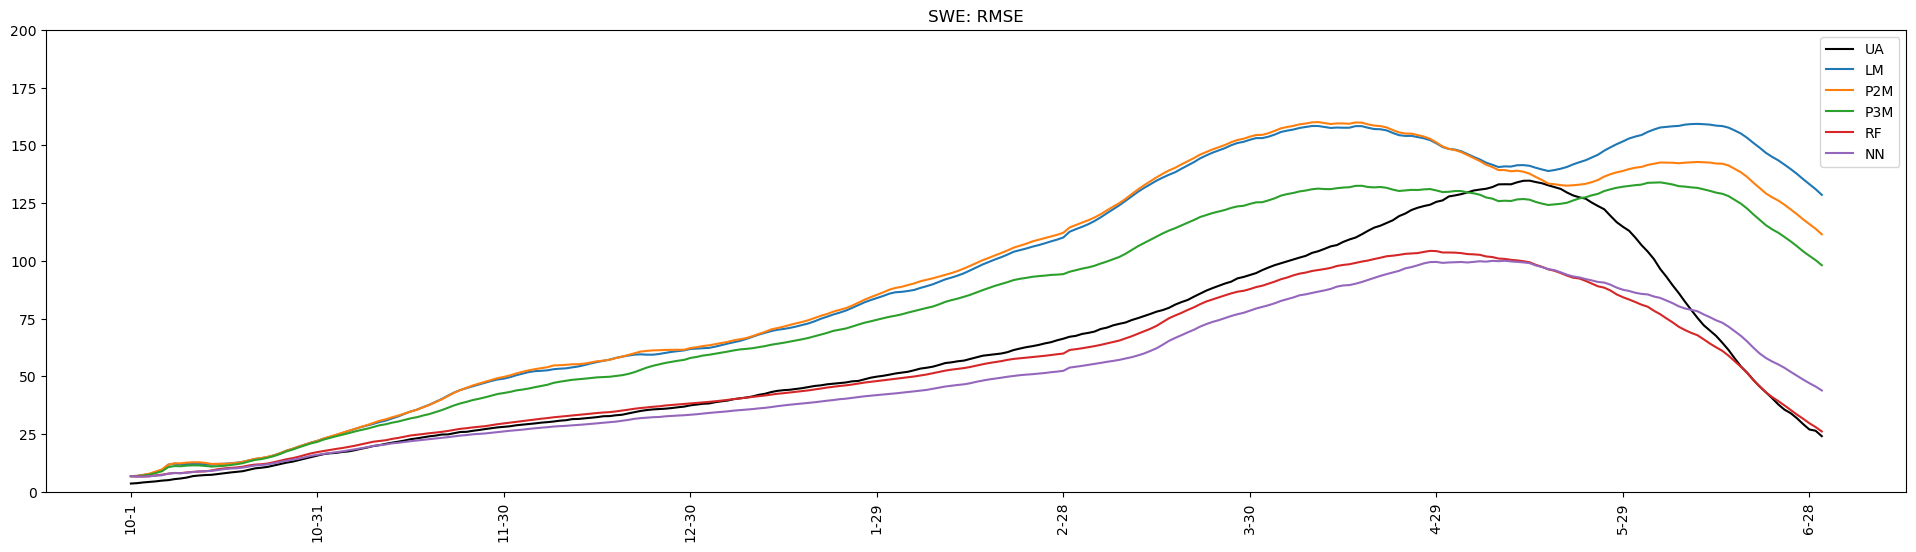

<Figure size 640x480 with 0 Axes>

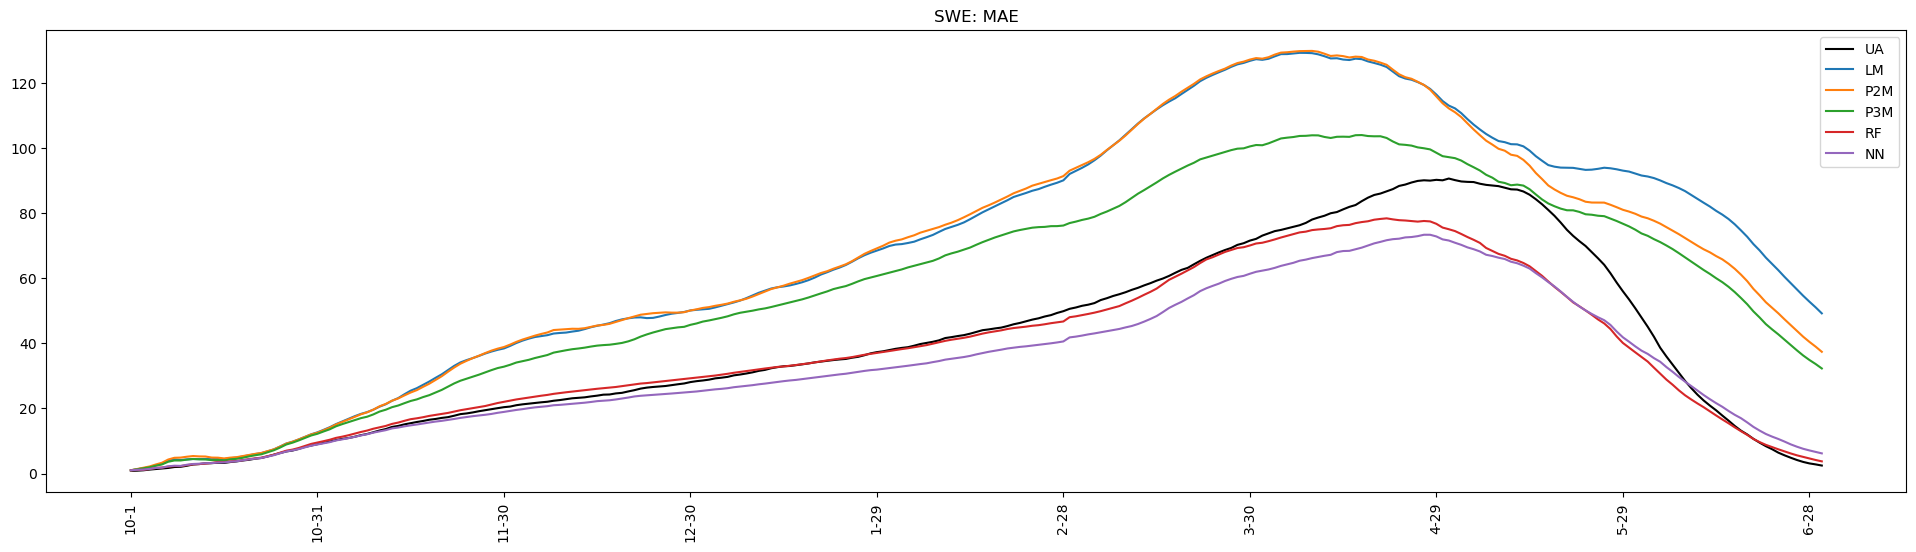

<Figure size 640x480 with 0 Axes>

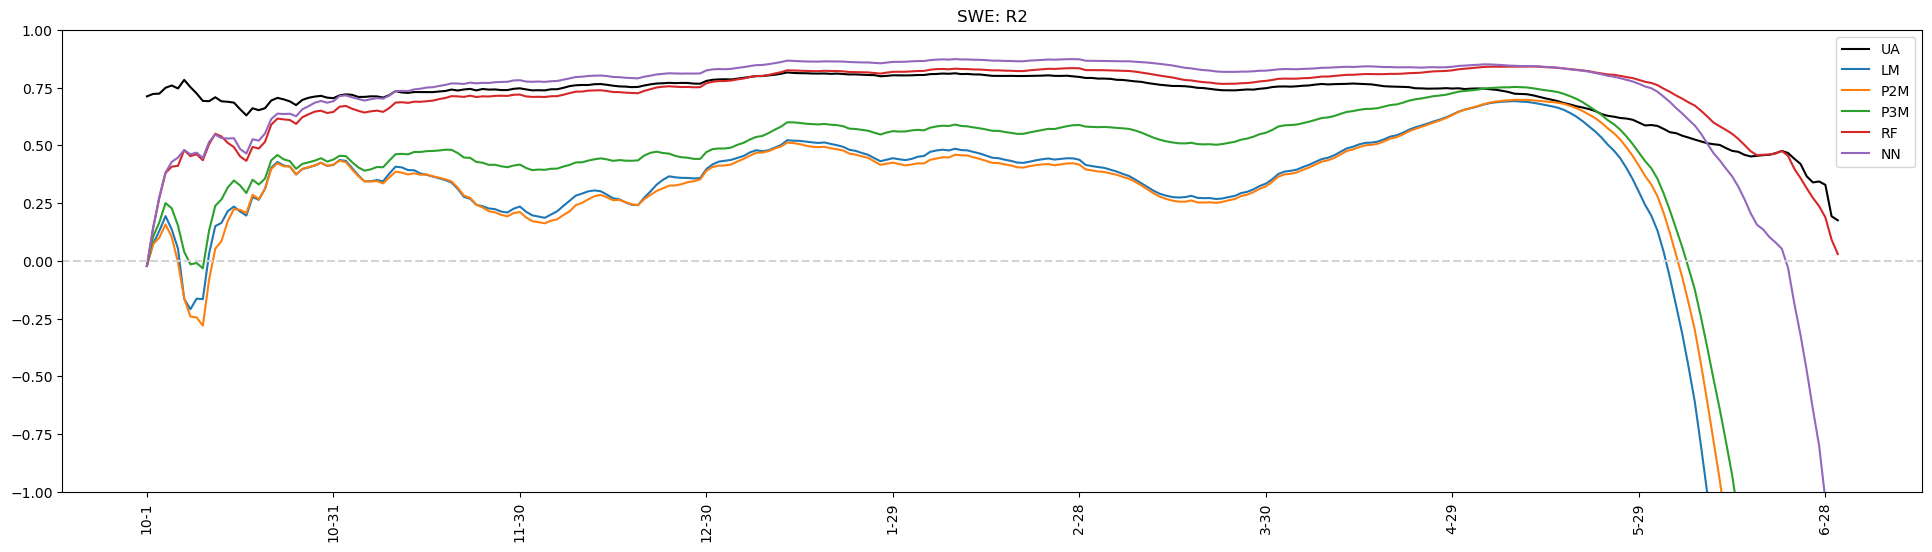

In [35]:
plt.clf()
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values, pd.concat([UASWE_metrics[181:]['mse'], UASWE_metrics[:181]['mse']]).values, label='UA', color='black')
ax.plot(pd.concat([LM_metrics[181:]['date'], LM_metrics[:181]['date']]).values, pd.concat([LM_metrics[181:]['mse'], LM_metrics[:181]['mse']]).values, label='LM')
ax.plot(pd.concat([P2M_metrics[181:]['date'], P2M_metrics[:181]['date']]).values, pd.concat([P2M_metrics[181:]['mse'], P2M_metrics[:181]['mse']]).values, label='P2M')
ax.plot(pd.concat([P3M_metrics[181:]['date'], P3M_metrics[:181]['date']]).values, pd.concat([P3M_metrics[181:]['mse'], P3M_metrics[:181]['mse']]).values, label='P3M')
ax.plot(pd.concat([RF_metrics[181:]['date'], RF_metrics[:181]['date']]).values, pd.concat([RF_metrics[181:]['mse'], RF_metrics[:181]['mse']]).values, label='RF')
ax.plot(pd.concat([NN_metrics[181:]['date'], NN_metrics[:181]['date']]).values, pd.concat([NN_metrics[181:]['mse'], NN_metrics[:181]['mse']]).values, label='NN')
ax.set_xticks(ax.get_xticks()[::30])   # tick at every 30th entry
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values)[::30])    # tick labels at every 30th entry
ax.set_title('SWE: MSE')
ax.legend()
# ax.axhline(200, linestyle='--', color='lightgrey')
# plt.savefig(f'{save_dir}{mode}/swe_eval/climatological_scheme/swe_mse_climat.png', dpi=300)
plt.show()

plt.clf()
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values, pd.concat([UASWE_metrics[181:]['rmse'], UASWE_metrics[:181]['rmse']]).values, label='UA', color='black')
ax.plot(pd.concat([LM_metrics[181:]['date'], LM_metrics[:181]['date']]).values, pd.concat([LM_metrics[181:]['rmse'], LM_metrics[:181]['rmse']]).values, label='LM')
ax.plot(pd.concat([P2M_metrics[181:]['date'], P2M_metrics[:181]['date']]).values, pd.concat([P2M_metrics[181:]['rmse'], P2M_metrics[:181]['rmse']]).values, label='P2M')
ax.plot(pd.concat([P3M_metrics[181:]['date'], P3M_metrics[:181]['date']]).values, pd.concat([P3M_metrics[181:]['rmse'], P3M_metrics[:181]['rmse']]).values, label='P3M')
ax.plot(pd.concat([RF_metrics[181:]['date'], RF_metrics[:181]['date']]).values, pd.concat([RF_metrics[181:]['rmse'], RF_metrics[:181]['rmse']]).values, label='RF')
ax.plot(pd.concat([NN_metrics[181:]['date'], NN_metrics[:181]['date']]).values, pd.concat([NN_metrics[181:]['rmse'], NN_metrics[:181]['rmse']]).values, label='NN')
ax.set_xticks(ax.get_xticks()[::30])   # tick at every 30th entry
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values)[::30])    # tick labels at every 30th entry
ax.set_title('SWE: RMSE')
ax.legend()
# ax.axhline(200, linestyle='--', color='lightgrey')
ax.set_ylim(0,200)
# plt.savefig(f'{save_dir}{mode}/swe_eval/climatological_scheme/swe_rmse_climat.png', dpi=300)
plt.show()

plt.clf()
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values, pd.concat([UASWE_metrics[181:]['mae'], UASWE_metrics[:181]['mae']]).values, label='UA', color='black')
ax.plot(pd.concat([LM_metrics[181:]['date'], LM_metrics[:181]['date']]).values, pd.concat([LM_metrics[181:]['mae'], LM_metrics[:181]['mae']]).values, label='LM')
ax.plot(pd.concat([P2M_metrics[181:]['date'], P2M_metrics[:181]['date']]).values, pd.concat([P2M_metrics[181:]['mae'], P2M_metrics[:181]['mae']]).values, label='P2M')
ax.plot(pd.concat([P3M_metrics[181:]['date'], P3M_metrics[:181]['date']]).values, pd.concat([P3M_metrics[181:]['mae'], P3M_metrics[:181]['mae']]).values, label='P3M')
ax.plot(pd.concat([RF_metrics[181:]['date'], RF_metrics[:181]['date']]).values, pd.concat([RF_metrics[181:]['mae'], RF_metrics[:181]['mae']]).values, label='RF')
ax.plot(pd.concat([NN_metrics[181:]['date'], NN_metrics[:181]['date']]).values, pd.concat([NN_metrics[181:]['mae'], NN_metrics[:181]['mae']]).values, label='NN')
ax.set_xticks(ax.get_xticks()[::30])   # tick at every 30th entry
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values)[::30])    # tick labels at every 30th entry
ax.set_title('SWE: MAE')
ax.legend()
# ax.axhline(200, linestyle='--', color='lightgrey')
# plt.savefig(f'{save_dir}{mode}/swe_eval/climatological_scheme/swe_mae_climat.png', dpi=300)
plt.show()

plt.clf()
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values, pd.concat([UASWE_metrics[181:]['r2'], UASWE_metrics[:181]['r2']]).values, label='UA', color='black')
ax.plot(pd.concat([LM_metrics[181:]['date'], LM_metrics[:181]['date']]).values, pd.concat([LM_metrics[181:]['r2'], LM_metrics[:181]['r2']]).values, label='LM')
ax.plot(pd.concat([P2M_metrics[181:]['date'], P2M_metrics[:181]['date']]).values, pd.concat([P2M_metrics[181:]['r2'], P2M_metrics[:181]['r2']]).values, label='P2M')
ax.plot(pd.concat([P3M_metrics[181:]['date'], P3M_metrics[:181]['date']]).values, pd.concat([P3M_metrics[181:]['r2'], P3M_metrics[:181]['r2']]).values, label='P3M')
ax.plot(pd.concat([RF_metrics[181:]['date'], RF_metrics[:181]['date']]).values, pd.concat([RF_metrics[181:]['r2'], RF_metrics[:181]['r2']]).values, label='RF')
ax.plot(pd.concat([NN_metrics[181:]['date'], NN_metrics[:181]['date']]).values, pd.concat([NN_metrics[181:]['r2'], NN_metrics[:181]['r2']]).values, label='NN')
ax.set_xticks(ax.get_xticks()[::30])   # tick at every 30th entry
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list(pd.concat([UASWE_metrics[181:]['date'], UASWE_metrics[:181]['date']]).values)[::30])    # tick labels at every 30th entry
ax.set_title('SWE: R2')
ax.legend()
ax.set_ylim(-1, 1)
ax.axhline(0, linestyle='--', color='lightgrey')
# plt.savefig(f'{save_dir}{mode}/swe_eval/climatological_scheme/swe_r2_climat.png', dpi=300)
plt.show()

## Site-Year

Compute metrics by site-year.

In [36]:
mse_swe_UASWE, mse_swe_LM, mse_swe_P2M, mse_swe_P3M, mse_swe_RF, mse_swe_NN = [], [], [], [], [], []
mae_swe_UASWE, mae_swe_LM, mae_swe_P2M, mae_swe_P3M, mae_swe_RF, mae_swe_NN = [], [], [], [], [], []
r2_swe_UASWE, r2_swe_LM, r2_swe_P2M, r2_swe_P3M, r2_swe_RF, r2_swe_NN = [], [], [], [], [], []

In [37]:
for site in np.unique(run_swe_dfs['sitecode']):
    for wy in np.unique(run_swe_dfs['water_year']):
        site_wy_df = run_swe_dfs[(run_swe_dfs['sitecode'] == site) & (run_swe_dfs['water_year'] == wy)]
        
        if not site_wy_df.empty:
            
            mse_swe_UASWE.append(mean_squared_error(site_wy_df['swe'], site_wy_df['UASWE'], squared=True))
            mse_swe_LM.append(mean_squared_error(site_wy_df['swe'], site_wy_df['pred_swe_LM'], squared=True))
            mse_swe_P2M.append(mean_squared_error(site_wy_df['swe'], site_wy_df['pred_swe_P2M'], squared=True))
            mse_swe_P3M.append(mean_squared_error(site_wy_df['swe'], site_wy_df['pred_swe_P3M'], squared=True))
            mse_swe_RF.append(mean_squared_error(site_wy_df['swe'], site_wy_df['pred_swe_RF'], squared=True))
            mse_swe_NN.append(mean_squared_error(site_wy_df['swe'], site_wy_df['pred_swe_NN'], squared=True))     
            mae_swe_UASWE.append(np.mean(abs(site_wy_df['UASWE'] - site_wy_df['swe'])))
            mae_swe_LM.append(np.mean(abs(site_wy_df['pred_swe_LM'] - site_wy_df['swe'])))
            mae_swe_P2M.append(np.mean(abs(site_wy_df['pred_swe_P2M'] - site_wy_df['swe'])))
            mae_swe_P3M.append(np.mean(abs(site_wy_df['pred_swe_P3M'] - site_wy_df['swe'])))
            mae_swe_RF.append(np.mean(abs(site_wy_df['pred_swe_RF'] - site_wy_df['swe'])))
            mae_swe_NN.append(np.mean(abs(site_wy_df['pred_swe_NN'] - site_wy_df['swe'])))
            r2_swe_UASWE.append(r2_score(site_wy_df['swe'], site_wy_df['UASWE']))
            r2_swe_LM.append(r2_score(site_wy_df['swe'], site_wy_df['pred_swe_LM']))
            r2_swe_P2M.append(r2_score(site_wy_df['swe'], site_wy_df['pred_swe_P2M']))
            r2_swe_P3M.append(r2_score(site_wy_df['swe'], site_wy_df['pred_swe_P3M']))
            r2_swe_RF.append(r2_score(site_wy_df['swe'], site_wy_df['pred_swe_RF']))
            r2_swe_NN.append(r2_score(site_wy_df['swe'], site_wy_df['pred_swe_NN']))


In [38]:
swe_metrics_med = {'UA SWE Reg': [np.median(mse_swe_UASWE), np.median(mae_swe_UASWE), np.median(r2_swe_UASWE)],
                   'Lin Reg': [np.median(mse_swe_LM), np.median(mae_swe_LM), np.median(r2_swe_LM)],
                   'Quad Reg': [np.median(mse_swe_P2M), np.median(mae_swe_P2M), np.median(r2_swe_P2M)],
                   'Cub Reg': [np.median(mse_swe_P3M), np.median(mae_swe_P3M), np.median(r2_swe_P3M)],
                   'RF': [np.median(mse_swe_RF), np.median(mae_swe_RF), np.median(r2_swe_RF)],
                   'NN': [np.median(mse_swe_NN), np.median(mae_swe_NN), np.median(r2_swe_NN)]
                  }
swe_metrics_mean = {'UA SWE Reg': [np.mean(mse_swe_UASWE), np.mean(mae_swe_UASWE), np.mean(r2_swe_UASWE)],
               'Lin Reg': [np.mean(mse_swe_LM), np.mean(mae_swe_LM), np.mean(r2_swe_LM)],
               'Quad Reg': [np.mean(mse_swe_P2M), np.mean(mae_swe_P2M), np.mean(r2_swe_P2M)],
               'Cub Reg': [np.mean(mse_swe_P3M), np.mean(mae_swe_P3M), np.mean(r2_swe_P3M)],
               'RF': [np.mean(mse_swe_RF), np.mean(mae_swe_RF), np.mean(r2_swe_RF)],
               'NN': [np.mean(mse_swe_NN), np.mean(mae_swe_NN), np.mean(r2_swe_NN)]
              }
swe_metrics_std = {'UA SWE Reg': [np.std(mse_swe_UASWE), np.std(mae_swe_UASWE), np.std(r2_swe_UASWE)],
               'Lin Reg': [np.std(mse_swe_LM), np.std(mae_swe_LM), np.std(r2_swe_LM)],
               'Quad Reg': [np.std(mse_swe_P2M), np.std(mae_swe_P2M), np.std(r2_swe_P2M)],
               'Cub Reg': [np.std(mse_swe_P3M), np.std(mae_swe_P3M), np.std(r2_swe_P3M)],
               'RF': [np.std(mse_swe_RF), np.std(mae_swe_RF), np.std(r2_swe_RF)],
               'NN': [np.std(mse_swe_NN), np.std(mae_swe_NN), np.std(r2_swe_NN)]
              }

In [39]:
swe_abl_means = pd.DataFrame(swe_metrics_mean, index=['MSE','MAE','R2'])

In [40]:
swe_abl_meds = pd.DataFrame(swe_metrics_med, index=['MSE','MAE','R2'])

In [41]:
swe_abl_stds = pd.DataFrame(swe_metrics_std, index=['MSE','MAE','R2'])

In [65]:
swe_abl_means.to_csv(f'{save_dir}{mode}/swe_eval/site_year_scheme/swe_abl_means.csv')
swe_abl_meds.to_csv(f'{save_dir}{mode}/swe_eval/site_year_scheme/swe_abl_meds.csv')
swe_abl_stds.to_csv(f'{save_dir}{mode}/swe_eval/site_year_scheme/swe_abl_stds.csv')

In [42]:
swe_abl_means

,UA SWE Reg,Lin Reg,Quad Reg,Cub Reg,RF,NN
MSE,5202.998678,11737.491861,11202.080234,8495.784553,3852.079771,3520.621769
MAE,39.953538,69.401056,67.561857,58.044450,36.845532,33.702984
R2,0.769881,0.393181,0.407929,0.531319,0.780401,0.804748


In [43]:
swe_abl_meds

,UA SWE Reg,Lin Reg,Quad Reg,Cub Reg,RF,NN
MSE,2029.506920,7964.244454,7229.497281,5353.128440,2176.066027,1892.325463
MAE,29.571282,62.371440,59.339194,49.996629,31.162544,27.726799
R2,0.866677,0.611719,0.634801,0.730406,0.884753,0.903033


# Climatological SWE Time Series

Generate climatological time series of SWE model predictions and compare it to that of SNOTEL SWE.

In [47]:
dfs_sub = run_swe_dfs[['datetime', 'swe', 'UASWE', 'pred_swe_UASWE',
       'pred_swe_LM', 'pred_swe_P2M', 'pred_swe_P3M', 'pred_swe_RF',
       'pred_swe_NN']]

In [48]:
snotel_swe_mean = dfs_sub.groupby([(pd.to_datetime(dfs_sub['datetime']).dt.month),(pd.to_datetime(dfs_sub['datetime']).dt.day)])['swe'].mean()
uaswe_swe_mean = dfs_sub.groupby([(pd.to_datetime(dfs_sub['datetime']).dt.month),(pd.to_datetime(dfs_sub['datetime']).dt.day)])['UASWE'].mean()
myswe_swe_mean = dfs_sub.groupby([(pd.to_datetime(dfs_sub['datetime']).dt.month),(pd.to_datetime(dfs_sub['datetime']).dt.day)])['pred_swe_UASWE'].mean()
lm_swe_mean = dfs_sub.groupby([(pd.to_datetime(dfs_sub['datetime']).dt.month),(pd.to_datetime(dfs_sub['datetime']).dt.day)])['pred_swe_LM'].mean()
p2m_swe_mean = dfs_sub.groupby([(pd.to_datetime(dfs_sub['datetime']).dt.month),(pd.to_datetime(dfs_sub['datetime']).dt.day)])['pred_swe_P2M'].mean()
p3m_swe_mean = dfs_sub.groupby([(pd.to_datetime(dfs_sub['datetime']).dt.month),(pd.to_datetime(dfs_sub['datetime']).dt.day)])['pred_swe_P3M'].mean()
rf_swe_mean = dfs_sub.groupby([(pd.to_datetime(dfs_sub['datetime']).dt.month),(pd.to_datetime(dfs_sub['datetime']).dt.day)])['pred_swe_RF'].mean()
nn_swe_mean = dfs_sub.groupby([(pd.to_datetime(dfs_sub['datetime']).dt.month),(pd.to_datetime(dfs_sub['datetime']).dt.day)])['pred_swe_NN'].mean()

In [49]:
# print(lm_swe_mean, p2m_swe_mean, p3m_swe_mean, rf_swe_mean)

In [50]:
snotel_swe_mean.index.names = ['Month', 'Day']
uaswe_swe_mean.index.names = ['Month', 'Day']
myswe_swe_mean.index.names = ['Month', 'Day']
lm_swe_mean.index.names = ['Month', 'Day']
p2m_swe_mean.index.names = ['Month', 'Day']
p3m_swe_mean.index.names = ['Month', 'Day']
rf_swe_mean.index.names = ['Month', 'Day']
nn_swe_mean.index.names = ['Month', 'Day']

In [51]:
snotel_swe_mean = snotel_swe_mean.to_frame()
uaswe_swe_mean = uaswe_swe_mean.to_frame()
myswe_swe_mean = myswe_swe_mean.to_frame()
lm_swe_mean = lm_swe_mean.to_frame()
p2m_swe_mean = p2m_swe_mean.to_frame()
p3m_swe_mean = p3m_swe_mean.to_frame()
rf_swe_mean = rf_swe_mean.to_frame()
nn_swe_mean = nn_swe_mean.to_frame()

In [52]:
snotel_swe_mean['date'] = snotel_swe_mean.index.get_level_values('Month').astype(str) + '-' + snotel_swe_mean.index.get_level_values('Day').astype(str)
uaswe_swe_mean['date'] = uaswe_swe_mean.index.get_level_values('Month').astype(str) + '-' + uaswe_swe_mean.index.get_level_values('Day').astype(str)
myswe_swe_mean['date'] = myswe_swe_mean.index.get_level_values('Month').astype(str) + '-' + myswe_swe_mean.index.get_level_values('Day').astype(str)
lm_swe_mean['date'] = lm_swe_mean.index.get_level_values('Month').astype(str) + '-' + lm_swe_mean.index.get_level_values('Day').astype(str)
p2m_swe_mean['date'] = p2m_swe_mean.index.get_level_values('Month').astype(str) + '-' + p2m_swe_mean.index.get_level_values('Day').astype(str)
p3m_swe_mean['date'] = p3m_swe_mean.index.get_level_values('Month').astype(str) + '-' + p3m_swe_mean.index.get_level_values('Day').astype(str)
rf_swe_mean['date'] = rf_swe_mean.index.get_level_values('Month').astype(str) + '-' + rf_swe_mean.index.get_level_values('Day').astype(str)
nn_swe_mean['date'] = nn_swe_mean.index.get_level_values('Month').astype(str) + '-' + nn_swe_mean.index.get_level_values('Day').astype(str)

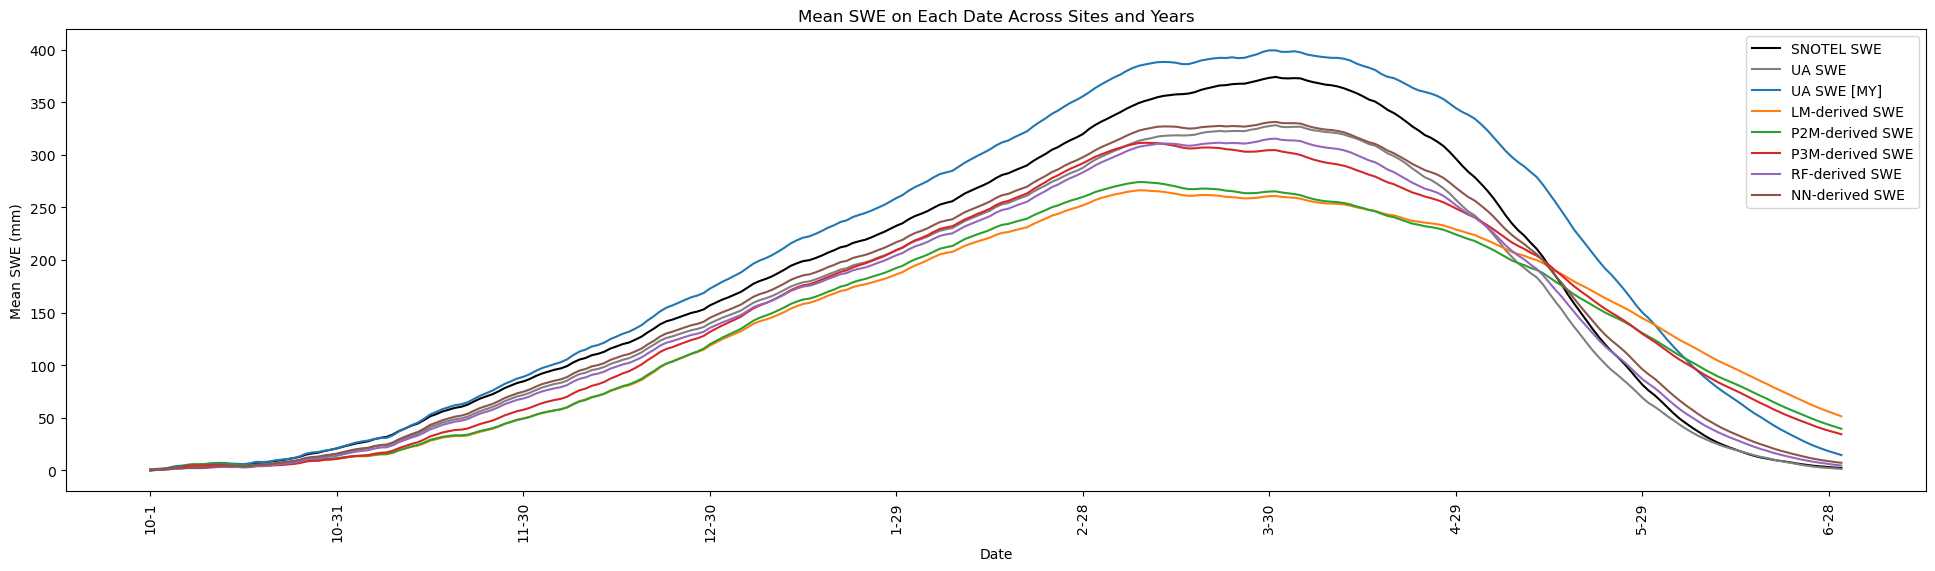

In [53]:
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(pd.concat([snotel_swe_mean[181:]['date'], snotel_swe_mean[:181]['date']]).values, pd.concat([snotel_swe_mean[181:]['swe'], snotel_swe_mean[:181]['swe']]).values, label='SNOTEL SWE', color='black')
ax.plot(pd.concat([uaswe_swe_mean[181:]['date'], uaswe_swe_mean[:181]['date']]).values, pd.concat([uaswe_swe_mean[181:]['UASWE'], uaswe_swe_mean[:181]['UASWE']]).values, label='UA SWE', color='grey')
ax.plot(pd.concat([myswe_swe_mean[181:]['date'], myswe_swe_mean[:181]['date']]).values, pd.concat([myswe_swe_mean[181:]['pred_swe_UASWE'], myswe_swe_mean[:181]['pred_swe_UASWE']]).values, label='UA SWE [MY]')
ax.plot(pd.concat([lm_swe_mean[181:]['date'], lm_swe_mean[:181]['date']]).values, pd.concat([lm_swe_mean[181:]['pred_swe_LM'], lm_swe_mean[:181]['pred_swe_LM']]).values, label='LM-derived SWE')
ax.plot(pd.concat([p2m_swe_mean[181:]['date'], p2m_swe_mean[:181]['date']]).values, pd.concat([p2m_swe_mean[181:]['pred_swe_P2M'], p2m_swe_mean[:181]['pred_swe_P2M']]).values, label='P2M-derived SWE')
ax.plot(pd.concat([p3m_swe_mean[181:]['date'], p3m_swe_mean[:181]['date']]).values, pd.concat([p3m_swe_mean[181:]['pred_swe_P3M'], p3m_swe_mean[:181]['pred_swe_P3M']]).values, label='P3M-derived SWE')
ax.plot(pd.concat([rf_swe_mean[181:]['date'], rf_swe_mean[:181]['date']]).values, pd.concat([rf_swe_mean[181:]['pred_swe_RF'], rf_swe_mean[:181]['pred_swe_RF']]).values, label='RF-derived SWE')
ax.plot(pd.concat([nn_swe_mean[181:]['date'], nn_swe_mean[:181]['date']]).values, pd.concat([nn_swe_mean[181:]['pred_swe_NN'], nn_swe_mean[:181]['pred_swe_NN']]).values, label='NN-derived SWE')
ax.set_xticks(ax.get_xticks()[::30])   # tick at every 30th entry
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(list(pd.concat([snotel_swe_mean[181:]['date'], snotel_swe_mean[:181]['date']]).values)[::30])    # tick labels at every 30th entry
ax.set_title('Mean SWE on Each Date Across Sites and Years')
ax.set_ylabel('Mean SWE (mm)')
ax.set_xlabel('Date')
ax.legend()
# ax.set_ylim(0,700)
# ax.axhline(200, linestyle='--', color='lightgrey')
# plt.savefig(f'{save_dir}{mode}/mean_swe_ts.png', dpi=300)